# ชื่อกลุ่ม : กลุ่ม RANDOM

# Design

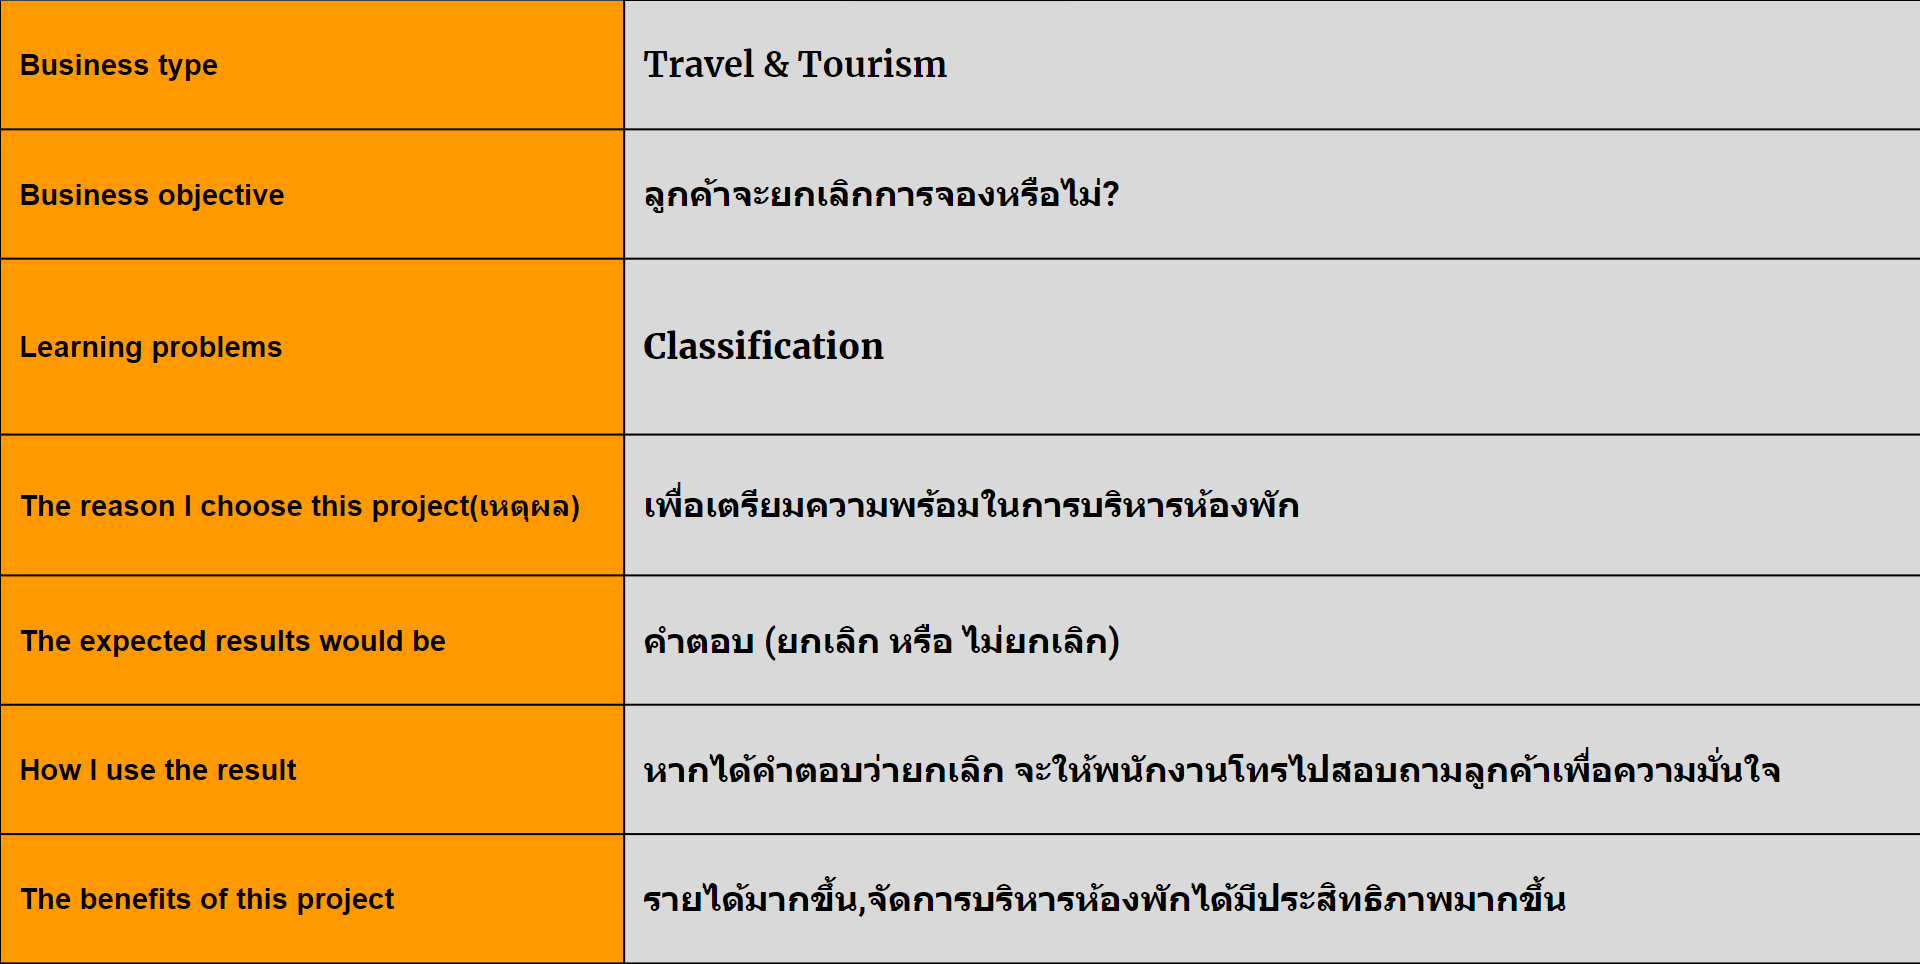

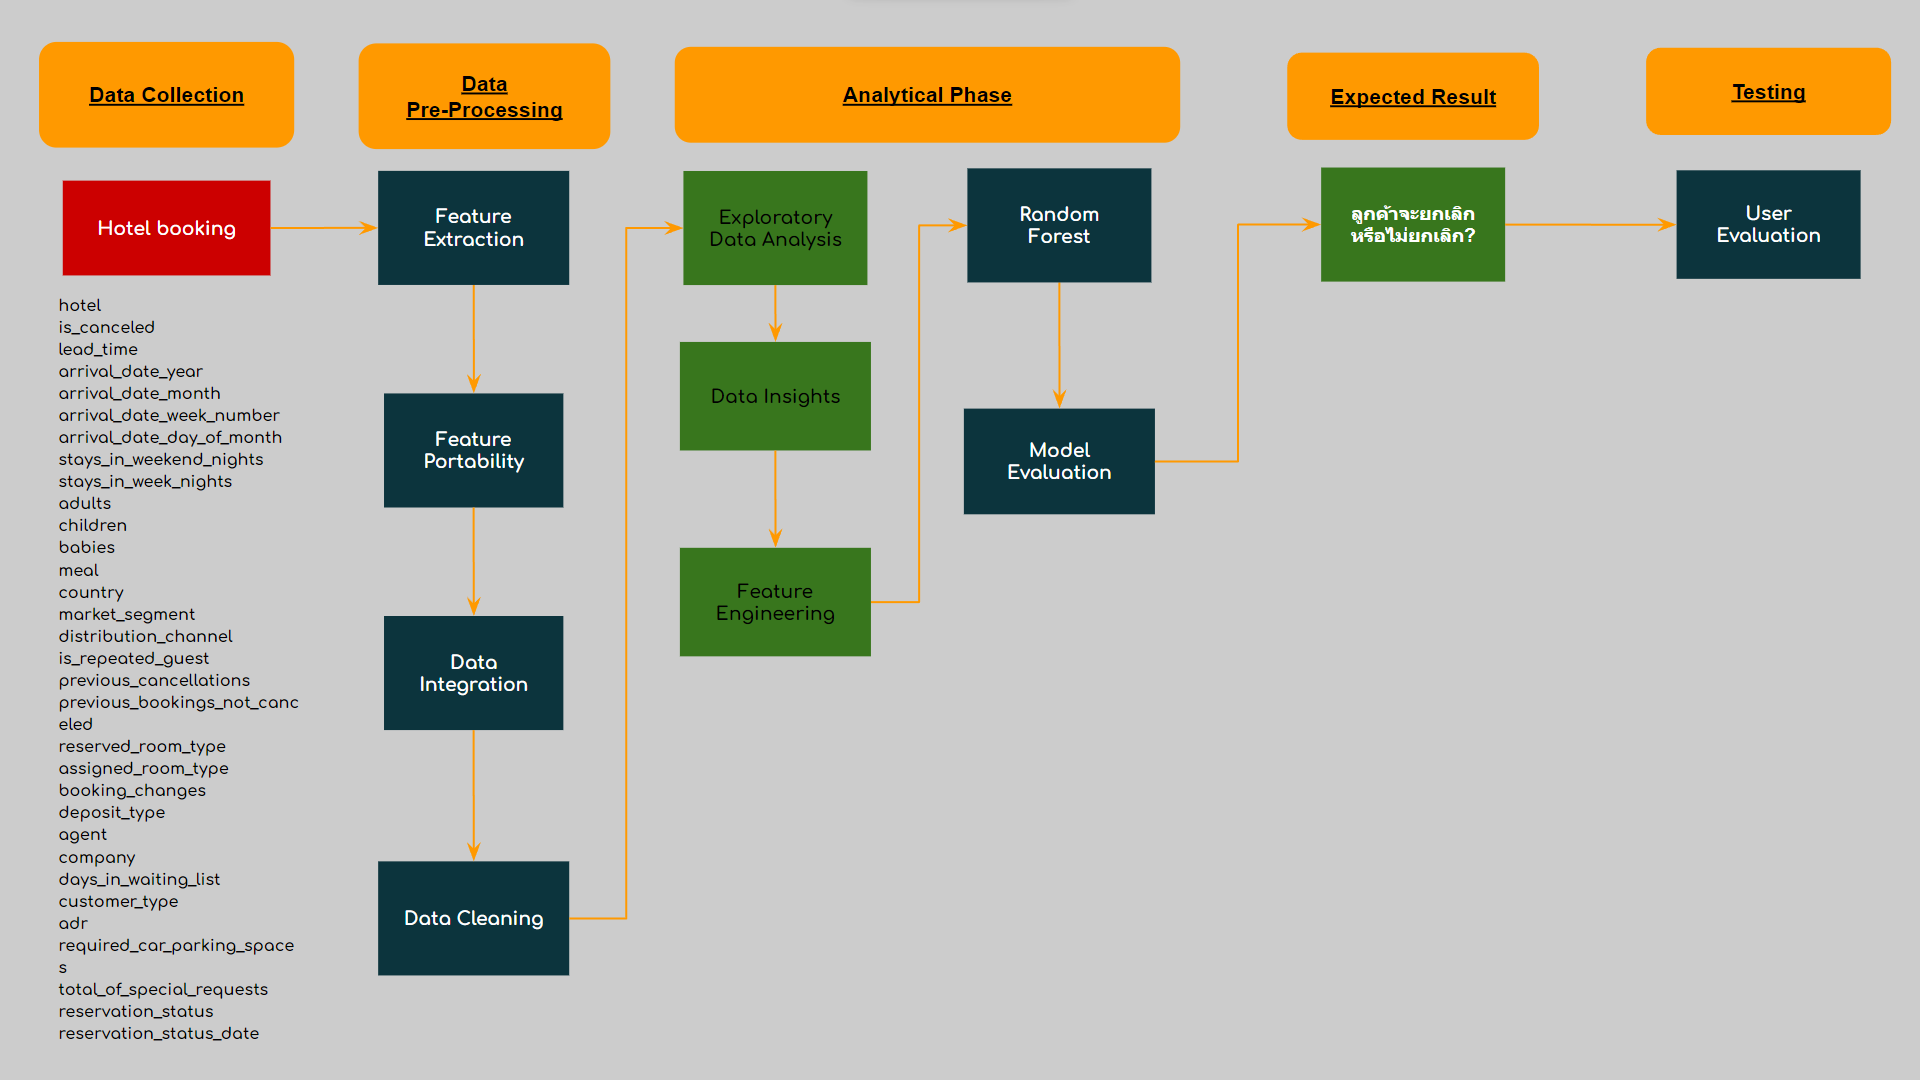

# library


In [728]:
import pandas as pd
import numpy as  np

# plot
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Time
import time

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [729]:
#path ไฟล์ dataset Hotel_booking
path = 'https://github.com/teerayut-bee/CS434-DataMining/raw/main/hotel_bookings.csv'

In [730]:
# แสดงข้อมูลตัวอย่าง 5 แถวแรก
hotel_csv = pd.read_csv(path)
hotel_csv.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Import Dataset
dataset : hotel_booking => https://www.kaggle.com/jessemostipak/hotel-booking-demand

ทำความเข้าใจ dataset
จะมีข้อมูลทั้งหมด 32 คอลัม, 119,390 แถว

In [731]:
#กำหนดความกว้างของตาราง
pd.set_option('max_colwidth', 400)

# reset
# pd.reset_option('^display.', silent=True)

In [732]:
hotel_csv.shape

(119390, 32)

In [733]:
description = {'hotel': 'ประเภทของ hotel', 'is_canceled': 'ยกเลิกการจอง', 'lead_time': 'จำนวนวันที่จองก่อนเข้าพัก', 'arrival_date_year': 'ปีที่เข้าพัก', 'arrival_date_month': 'เดือนที่เข้าพัก', 'arrival_date_week_number': 'สัปดาห์ของปีที่เข้าพัก', 'arrival_date_day_of_month': 'วันที่เข้าพัก', 'stays_in_weekend_nights': 'จำนวนคืนที่จองหรือเข้าพักในช่วงสุดสัปดาห์', 'stays_in_week_nights': 'จำนวนคืนที่จองหรือเข้าพักในช่วงวันธรรมดา จ. ถึง ศุกร์', 'adults': 'จำนวนผู้ใหญ่', 'children': 'จำนวนเด็ก', 'babies': 'จำนวนทารก', 'meal': 'ประเภทของอาหาร', 'country': 'ประเทศผู้เข้าพัก', 'market_segment': 'ส่วนทางการตลาด', 'distribution_channel': 'ช่องทางการจัดจำหน่ายการจอง', 'is_repeated_guest': 'เข้าพักซ้ำ', 'previous_cancellations': 'จำนวนการจองก่อนหน้าลูกค้าจะยกเลิกการจอง', 'previous_bookings_not_canceled': 'จำนวนการจองก่อนหน้าลูกค้าที่ไม่ยกเลิกการจอง', 'reserved_room_type': 'ประเภทห้องสำรอง', 'assigned_room_type': 'ประเภทห้องจอง', 'booking_changes': 'จำนวนการเปลี่ยนแปลงหรือแก้ไข บน PMS ก่อนที่จะเช็คอิน หรือยกเลิก', 'deposit_type': 'ประเภทเงินฝาก', 'agent': 'ตัวแทน', 'company': 'บริษัท', 'days_in_waiting_list': 'จำนวนวันที่่รอลูกค้า comfirm', 'customer_type': 'ประเภทลูกค้า', 'adr': 'ราคาเฉลี่ยในช่วงวัน', 'required_car_parking_spaces': 'จำนวนที่จอดรถที่ลูกค้าต้องการ', 'total_of_special_requests': 'จำนวนคำขอพิเศษที่ลูกค้าทำ (เช่น ขอเตียงคู่)', 'reservation_status': 'สถานะการจอง', 'reservation_status_date': 'วันที่ สถานะการจอง'}
def exam_df(df):
  exam = {'feature':[], 'type':[], 'description':[], 'exam':[]}
  for i,col in enumerate(list(df.columns)):
    exam['feature'].append(col)
    exam['type'].append(df[col].dtypes)
    exam['description'].append(description[col])
    if df[col].dtypes in ['int64','float64']:
      if df[col].max() > 1 and col != 'arrival_date_year':
        exam['exam'].append('number')
      else:
        exam['exam'].append(list(df[col].unique()))
    elif col == 'reservation_status_date':
      exam['exam'].append('Date')
    else:
      exam['exam'].append(list(df[col].unique()))
  return pd.DataFrame(exam).style.set_properties(**{'text-align': 'left'}).set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])

In [734]:
exam_df(hotel_csv)

,feature,type,description,exam
0,hotel,object,ประเภทของ hotel,"['Resort Hotel', 'City Hotel']"
1,is_canceled,int64,ยกเลิกการจอง,"[0, 1]"
2,lead_time,int64,จำนวนวันที่จองก่อนเข้าพัก,number
3,arrival_date_year,int64,ปีที่เข้าพัก,"[2015, 2016, 2017]"
4,arrival_date_month,object,เดือนที่เข้าพัก,"['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']"
5,arrival_date_week_number,int64,สัปดาห์ของปีที่เข้าพัก,number
6,arrival_date_day_of_month,int64,วันที่เข้าพัก,number
7,stays_in_weekend_nights,int64,จำนวนคืนที่จองหรือเข้าพักในช่วงสุดสัปดาห์,number
8,stays_in_week_nights,int64,จำนวนคืนที่จองหรือเข้าพักในช่วงวันธรรมดา จ. ถึง ศุกร์,number
9,adults,int64,จำนวนผู้ใหญ่,number


# Data Preprocessing



*   Check
*   Cleaning





## Check

In [735]:
# Check Type
hotel_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [736]:
# จำนวนข้อมูล (Row, Column)
hotel_csv.shape

(119390, 32)

In [737]:
# Check Na
hotel_csv.isna().sum()

# จะเห็นได้ว่ามี Column ที่มีค่า Na อยู่ ทั้งหมด 4 Column (company, agent, country, children)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [738]:
# คิดเป็น %
hotel_csv.isna().sum()/hotel_csv.shape[0]*100

# เมื่อนำมาคิดเป็น % จะเห็นได้ว่า company นั้นมีค่าที่เป็น Na ถึง 94% ของแถวทั้งหมด
# และยังมี agent, country และ children ที่มีค่าเป็น Na

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [739]:
# เช็คความหลากหลายของข้อมูล
hotel_csv.nunique()/hotel_csv.shape[0]

hotel                             0.000017
is_canceled                       0.000017
lead_time                         0.004012
arrival_date_year                 0.000025
arrival_date_month                0.000101
arrival_date_week_number          0.000444
arrival_date_day_of_month         0.000260
stays_in_weekend_nights           0.000142
stays_in_week_nights              0.000293
adults                            0.000117
children                          0.000042
babies                            0.000042
meal                              0.000042
country                           0.001483
market_segment                    0.000067
distribution_channel              0.000042
is_repeated_guest                 0.000017
previous_cancellations            0.000126
previous_bookings_not_canceled    0.000611
reserved_room_type                0.000084
assigned_room_type                0.000101
booking_changes                   0.000176
deposit_type                      0.000025
agent      

## Cleaning



```
### จัดการกับข้อมูลที่เป็น Na ###
# children จะปรับให้ข้อมูลเป็นค่า 0
# agent จะปรับให้เป็น 0
# delete แถว country ที่เป็นค่าว่าง
# drop company เพราะมี Na เยอะ

### แก้ไขข้อมูลที่อยู่ในคอลัมให้มีความเหมือนกัน ###
# meal : แก้ Undefined เป็น SC เพราะว่า SC 
# country : แก้ CN เป็น CHN เพราะคือประเทศจีนเหมือนกัน และข้อมูลใน Feature นี้ใช้ตัวย่อแบบ 3 ตัวอักษร
```



In [740]:
# Copy Data Set
hotel_clean = hotel_csv.copy()

In [741]:
# Check Na
hotel_clean.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### จัดการ Na

In [742]:
# จัดการกับข้อมูลที่เป็น Na
# children จะปรับให้ข้อมูลเป็นค่า 0
# agent จะปรับให้เป็น 0

nan_replacements = {"children": 0, "agent": 0}
hotel_clean = hotel_clean.fillna(nan_replacements)

# delete แถว country ที่เป็นค่าว่าง
# drop company เพราะมี Na เยอะ

hotel_clean.dropna(subset = ["country"], inplace=True)
hotel_clean.drop(['company'], axis =1,inplace=True)

In [743]:
# Check Na
hotel_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [744]:
#Check
hotel_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [745]:
#Check Type
hotel_clean.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

> แก้ไข TYPE
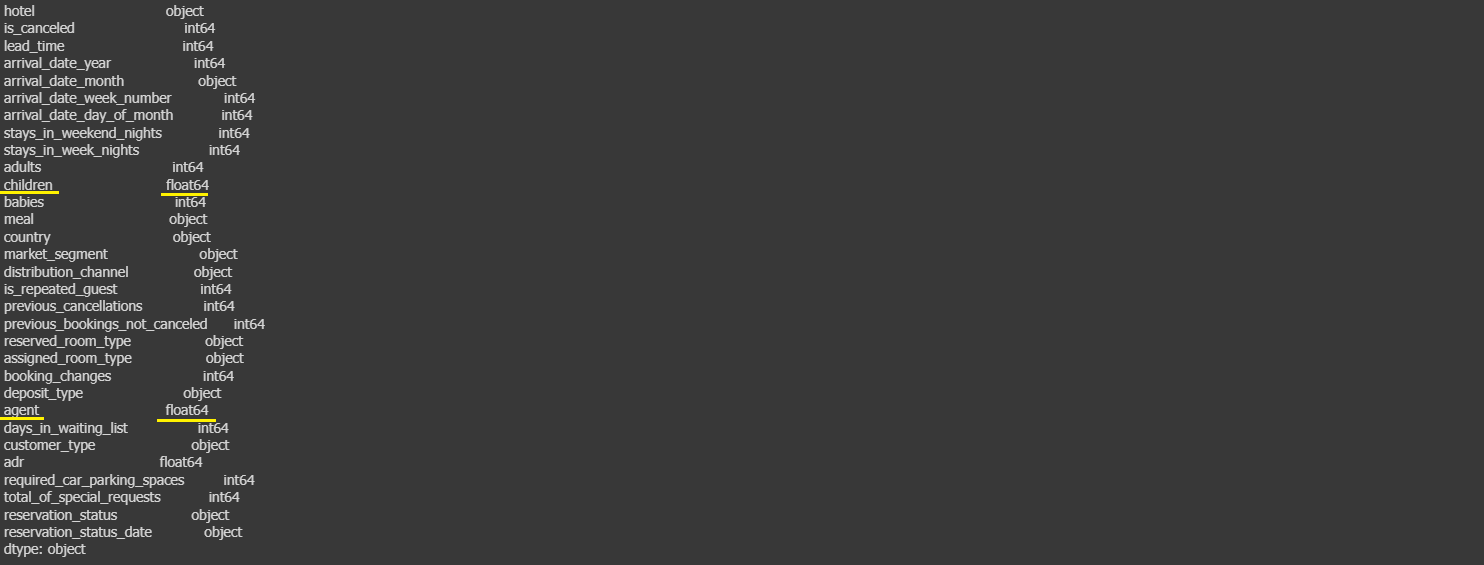

In [746]:
#เห็น children มี type เป็น Float เลยมาเช็คเพิ่ม
hotel_clean[['children', 'agent']].head()

,children,agent
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,304.0
4,0.0,240.0


In [747]:
#เห็น children มี type เป็น Float เลยมาเช็คเพิ่ม
hotel_clean['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [748]:
#ผมสงสัยว่าที่แสดงผลออกมาไม่เห็นมีค่าทศนิยม จึงไปดึงข้อมูลจากคอลัมที่มีทศนิยมมาเปรียบเทียบ
hotel_clean['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [749]:
#เห็น agent มี type เป็น Float เลยมาเช็คเพิ่ม
hotel_clean['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301.,
       193., 182., 135., 350., 195., 352., 355., 159., 139., 363., 384.,
       360., 331., 367.,  64.,  78., 406., 163., 41

In [750]:
#children  เดิมเป็น float ปรับเป็น int
#agent ปรับเป็น int
hotel_clean['children']= hotel_clean['children'].astype(int)
hotel_clean['agent']= hotel_clean['agent'].astype(int)

In [751]:
#เช็ค type
hotel_clean[['children', 'agent']].dtypes

children    int64
agent       int64
dtype: object

In [752]:
#ดูข้อมูลตัวอย่างหลังแก้ไข type
hotel_clean[['children', 'agent']].head()

,children,agent
0,0,0
1,0,0
2,0,0
3,0,304
4,0,240


### exam dataset

In [753]:
#ดูรายละเอียดข้อมูลหลังจัดการค่าว่าง
exam_df(hotel_clean)

,feature,type,description,exam
0,hotel,object,ประเภทของ hotel,"['Resort Hotel', 'City Hotel']"
1,is_canceled,int64,ยกเลิกการจอง,"[0, 1]"
2,lead_time,int64,จำนวนวันที่จองก่อนเข้าพัก,number
3,arrival_date_year,int64,ปีที่เข้าพัก,"[2015, 2016, 2017]"
4,arrival_date_month,object,เดือนที่เข้าพัก,"['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']"
5,arrival_date_week_number,int64,สัปดาห์ของปีที่เข้าพัก,number
6,arrival_date_day_of_month,int64,วันที่เข้าพัก,number
7,stays_in_weekend_nights,int64,จำนวนคืนที่จองหรือเข้าพักในช่วงสุดสัปดาห์,number
8,stays_in_week_nights,int64,จำนวนคืนที่จองหรือเข้าพักในช่วงวันธรรมดา จ. ถึง ศุกร์,number
9,adults,int64,จำนวนผู้ใหญ่,number


### แก้ไขข้อมูลที่อยู่ในคอลัมให้มีความเหมือนกัน

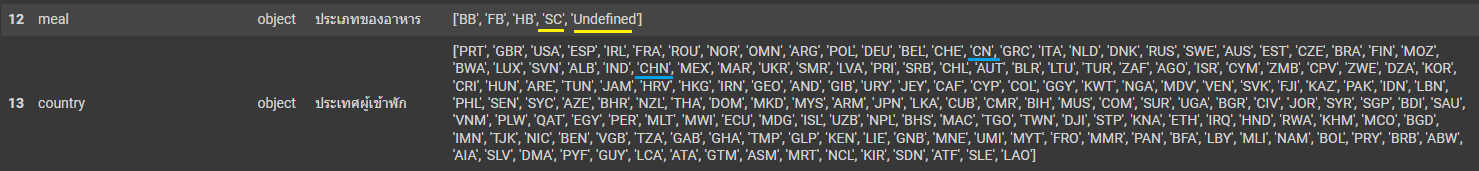

แก้ไขข้อมูลที่อยู่ในคอลัมให้มีความเหมือนกัน


*   meal : แก้ Undefined เป็น SC เพราะว่า SC คือการไม่รับอาหาร ส่วน Undefined คือการไม่ระบุ ดังนั้นจึงอนุมาณว่ามันมีความหมายเดียวกันคือไม่รับอาหาร
*   country : ข้อมูลโดยรวมจะใช้เป็นตัวย่อ 3 ตัวอักษรแทนประเทศ แต่มีอยู่หนึ่งประเทศที่ข้อมูลมีสองรูปแบบคือ ประเทศจีน มีทั้ง CHN และ CN ดังนั้นเราจึงจะเปลี่ยนข้อมูลให้อยู่ในรูปแบบเดียวกัน (เคสนี้มีแค่ 1 ตัวจึงสามารถปรับได้เลย แต่ถ้าหากมันมีมากกว่านี้แนะนำให้ import pycountry และ pycountry-convert เข้ามาช่วย เพราะจะช่วยในเรื่องของการแปลงตัวย่อแบบ 2 หรือ 3 ตัว หรือชื่อ สามารถแปลงไปกลับได้)



In [754]:
# เปลี่ยนข้อมูลที่เป็น Undefined เป็น SC
# เพราะว่า SC คือการไม่รับอาหาร ส่วน Undefined คือการไม่ระบุ ดังนั้นจึงอนุมาณว่ามันมีความหมายเดียวกันคือไม่รับอาหาร
hotel_clean["meal"].replace("Undefined", "SC", inplace=True)
hotel_clean['meal'].value_counts()

BB    91867
HB    14434
SC    11803
FB      798
Name: meal, dtype: int64

In [755]:
hotel_clean["country"].replace("CN", "CHN", inplace=True)
hotel_clean['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CHN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'MEX', 'MAR', 'UKR', 'SMR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI',
       'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND',
       'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA',
       'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL',
       'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM',
       'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 'IRQ',

# EDA

In [756]:
import plotly.graph_objects as go

### โรงแรมประเภทไหนมีการจองห้องพักมากที่สุด?


---



In [757]:
fig = go.Figure(data=[go.Pie(textinfo='label,value,percent',labels=hotel_clean['hotel'].value_counts().index, values=hotel_clean['hotel'].value_counts().values, hole=.2)])
fig.update_layout(height=600, width=600, title_text=str('โรงแรมประเภทไหนมีการจองห้องพักมากที่สุด?').upper(), yaxis_title="Year",title_x = 0.5)
fig.show()


โรงแรมประเภทไหนมีการจองห้องพักมากที่สุด?
```
# จะเห็นได้ว่าโรงแรมประเทท City Hotel นั้นมีจำนวนการจองห้องพักถึง 79,306 รายการ คิดเป็น 66.7% ของการจองทั้งหมด
# และโรงแรมประเภท Resort Hotel นั้นมียอดการจองประมาณ 50% ของโรงแรมประเภท City Hotel

# สรุป City Hotel มียอดการจองห้องพักมากที่สุด
```






### ช่วงเดือนไหนมีการจองห้องพักมากที่สุด ในระยะเวลา 3 ปี ที่ผ่านมา?
---


In [758]:
hotel_clean['arrival_date_month'].value_counts()

August       13856
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

In [759]:
year_dict = {'year':[], 'month': [], 'value': []}
for year_booking in [2015,2016,2017]:
  count = 0
  for m in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    fillter = hotel_clean.loc[hotel_clean['arrival_date_year'] == year_booking]
    fillter_month = fillter['arrival_date_month'].value_counts()
    if m in list(fillter_month.index):
      ind = list(fillter_month.index).index(m)
      year_dict['year'].append(year_booking)
      year_dict['month'].append(m)
      year_dict['value'].append(list(fillter_month.values)[ind])
    else:
      year_dict['year'].append(year_booking)
      year_dict['month'].append(m)
      year_dict['value'].append(0)
year_df = pd.DataFrame(year_dict)
year_df

,year,month,value
0,2015,January,0
1,2015,February,0
2,2015,March,0
3,2015,April,0
4,2015,May,0
5,2015,June,0
6,2015,July,2763
7,2015,August,3877
8,2015,September,5084
9,2015,October,4919


In [760]:
fig = px.line(year_df, x='month', y='value', color='year', text='value')
fig.update_traces(textposition="top right")
fig.show()

ช่วงเดือนไหนมีการจองห้องพักมากที่สุด ในระยะเวลา 3 ปี ที่ผ่านมา?


```
# ข้อมูล dataset ของเรานั้นจะเริ่มเก็บตั้งแต่เดือนกรกฎาคม ปี 2015 เป็นต้นไป 
# เป็นข้อมูลของโรงแรมในประเทศโปรตุเกต
# และเมื่อเราดูข้อมูลจากทั้งสามปีจะเห็นได้ว่าช่วงเดือนพฤษภาคม ปี 2017 นั้นมีคนจองมากที่สุดถึง 6313 ห้องรองลงมาคือ เดือนตุลาคม ปี 2016 ที่ 6176 ห้อง
# โดยช่วงจำนวนการจองนั้นมักจะอยู่ในช่วง ฤดูใบไม้ผลิ (ระหว่างเดือนเมษายน-พฤษภาคม) จนถึง ฤดูร้อน (มิถุนายน - เดือนกันยายน )
# และในช่วง(เดือนตุลาคม - เดือนมีนาคม) เป็นฤดูหนาวทำให้มีจำนวนการจองที่ลดลงสูงสุดประมาณ 50 %
```





### โรงแรมแต่ละประเภทมีจำนวนเข้าพักและยกเลิกไปเท่าไหร่?


---



In [761]:
# แยก Hotel
city = hotel_clean.loc[(hotel_clean['hotel']=='City Hotel')]
resort = hotel_clean.loc[(hotel_clean['hotel'] !='City Hotel')]

# นับจำนวนของการยกเลิกหรือไม่ยกเลิกในแต่ละโรงแรม
# ch = city hotel
# rh = resort hotel
ch = {}
rh = {}
ch['not cancel'] = city.loc[(hotel_clean['is_canceled'] == 0), 'is_canceled'].count()
ch['cancel'] = city.loc[(hotel_clean['is_canceled'] == 1), 'is_canceled'].count()
rh['not cancel'] = resort.loc[(hotel_clean['is_canceled'] == 0), 'is_canceled'].count()
rh['cancel'] = resort.loc[(hotel_clean['is_canceled'] == 1), 'is_canceled'].count()
hotel=['City Hotel', 'Resort Hotel']

fig = go.Figure(data=[
    go.Bar(name='ไม่ยกเลิก', x=hotel, y=[ch['not cancel'], rh['not cancel']], text=[ch['not cancel'], rh['not cancel']]),
    go.Bar(name='ยกเลิก', x=hotel, y=[ch['cancel'], rh['cancel']], text=[ch['cancel'], rh['cancel']])
])
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    height=500, 
    width=500,
    title_text='โรงแรมแต่ละประเภทมีจำนวนเข้าพักและยกเลิกไปเท่าไหร่?', 
    yaxis_title='จำนวน', 
    xaxis_title='ประเภทโรงแรม',
    title_x = 0.5,
)
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


โรงแรมแต่ละประเภทมีจำนวนเข้าพักและยกเลิกไปเท่าไหร่?
```
# ยอดการยกเลิกการจองของโรงแรมประเภท City Hotel นั้นมีการยกเลิกที่เยอะมากที่สุด โดยมีการยกเลิกการจองถึง 33,080 ครั้ง หรือประมาณ 3 ใน 4 ส่วน ของยอดจองทั้งหมดของโรงแรมประเภทนี้
# ส่วนของโรงแรมประเภท Resort Hotel มียอดการยกเลิกการจองอยู่ที่ 11,070 ครั้งหรือคิดเป็น 1 ใน 3 ของยอดจองทั้งหมดของโรงแรมประเภทนี้
```



###ช่วงเดือนไหนมียอดการยกเลิกการจองมากที่สุด?

---



In [762]:
year_dict = {'year':[], 'month': [], 'value': []}
for year_booking in [2015,2016,2017]:
  count = 0
  for m in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    fillter = hotel_clean.loc[(hotel_clean['arrival_date_year'] == year_booking) & (hotel_clean['is_canceled']== 1), 'arrival_date_month'].value_counts()
    if m in list(fillter.index):
      ind = list(fillter.index).index(m)
      year_dict['year'].append(year_booking)
      year_dict['month'].append(m)
      year_dict['value'].append(list(fillter.values)[ind])
    else:
      year_dict['year'].append(year_booking)
      year_dict['month'].append(m)
      year_dict['value'].append(0)
year_df = pd.DataFrame(year_dict)

In [763]:
fig = px.line(year_df, x='month', y='value', color='year', text='value')
fig.update_traces(textposition="top right")
fig.show()

ช่วงเดือนไหนมียอดการยกเลิกการจองมากที่สุด?


```
# ช่วงที่มีการยกเลิกการจองมากที่สุดคือเดือนพฤษภาคม ปี 2017 มีการยกเลิกการจองถึง 2,762 ครั้ง และรองลงมาคือเดือนตุลาคมในปี 2016 
# และช่วงที่มีการยกเลิกการจองน้อยที่สุดที่สุดคือเดือน พฤศจิกายน ที่มีเพียง 486 ครั้ง
```



###ช่วงในแต่ละละเดือน โรงแรมแต่ละประเภทมีการยกเลิกการจองห้องพักเท่าไหร่?

---



In [764]:
year_dict = {'year':[], 'hotel':[] , 'month': [], 'value': [], 'count_cancel': []}
for year_booking in [2015,2016,2017]:
  count = 0
  
  for m in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    for ht in list(hotel_clean['hotel'].unique()):
      fillter = hotel_clean.loc[(hotel_clean['arrival_date_year'] == year_booking) & (hotel_clean['hotel'] == ht)]
      fillter_month = fillter['arrival_date_month'].value_counts()
      count_cancel = fillter.loc[fillter['is_canceled'] == 1]['is_canceled'].value_counts()
      if m in list(fillter_month.index):
        ind = list(fillter_month.index).index(m)
        year_dict['year'].append(year_booking)
        year_dict['hotel'].append(ht)
        year_dict['month'].append(m)
        year_dict['value'].append(list(fillter_month.values)[ind])
        year_dict['count_cancel'].append(count_cancel.values[0])
      else:
        year_dict['year'].append(year_booking)
        year_dict['hotel'].append(ht)
        year_dict['month'].append(m)
        year_dict['value'].append(0)
        year_dict['count_cancel'].append(0)
year_df = pd.DataFrame(year_dict)
year_df.head()

,year,hotel,month,value,count_cancel
0,2015,Resort Hotel,January,0,0
1,2015,City Hotel,January,0,0
2,2015,Resort Hotel,February,0,0
3,2015,City Hotel,February,0,0
4,2015,Resort Hotel,March,0,0


In [765]:
#resort
resort_2015 = list(year_df.loc[(year_df['year'] == 2015) & (year_df['hotel'] == 'Resort Hotel')]['value'].values)
resort_2016 = list(year_df.loc[(year_df['year'] == 2016) & (year_df['hotel'] == 'Resort Hotel')]['value'].values)
resort_2017 = list(year_df.loc[(year_df['year'] == 2017) & (year_df['hotel'] == 'Resort Hotel')]['value'].values)
city_2015 = list(year_df.loc[(year_df['year'] == 2015) & (year_df['hotel'] == 'City Hotel')]['value'].values)
city_2016 = list(year_df.loc[(year_df['year'] == 2016) & (year_df['hotel'] == 'City Hotel')]['value'].values)
city_2017 = list(year_df.loc[(year_df['year'] == 2017) & (year_df['hotel'] == 'City Hotel')]['value'].values)

In [766]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=city_2015, name='City 2015',
                         line = dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=month, y=city_2016, name='City 2016',
                         line = dict(color='yellow', width=2)))
fig.add_trace(go.Scatter(x=month, y=city_2017, name='City 2017',
                         line=dict(color='purple', width=2)))

fig.add_trace(go.Scatter(x=month, y=resort_2015, name='Resort 2015',
                         line=dict(color='red', width=2, dash='dash')))
fig.add_trace(go.Scatter(x=month, y=resort_2016, name = 'Resort 2016',
                         line=dict(color='green', width=2, dash='dash')))
fig.add_trace(go.Scatter(x=month, y=resort_2017, name='Resort 2017',
                         line=dict(color='blue', width=2, dash='dash')
))


# Edit the layout
fig.update_layout(title='ช่วงในแต่ละละเดือน โรงแรมแต่ละประเภทมีการยกเลิกการจองห้องพักเท่าไหร่?',
                   xaxis_title='Month',
                   yaxis_title='จำนวนการยกเลิก')


fig.show()

ช่วงในแต่ละละเดือน โรงแรมแต่ละประเภทมีการยกเลิกการจองห้องพักเท่าไหร่?


```
# และถ้าเรามาดูในแต่ละโรงแรม จะเห็นได้ว่าโรงแรมที่เป็นประเภท City Hotel นั้นมียอดการยกเลิกที่สูง 
#และในเดือน พฤษภาคมปี 2017 นั้นมีการยกเลิกการจองไปทั้งหมดถึง 4556 ครั้ง 
#เมื่อเทียบกับโรงแรมประเภท Resort Hotel นั้นคิดเป็นประมาณ 4 เท่า
```



#Feature Engineer

---



In [767]:
from sklearn.preprocessing import LabelEncoder

## Feature Interaction

In [768]:
# copy ข้อมูลหลังจากทำ data clean
hotel_feature = hotel_clean.copy()

In [769]:
# เด็กรวมทั้งหมด (children+babies)
hotel_feature['all_children'] = hotel_feature['children'] + hotel_feature['babies']

## Feature Encoder

In [770]:
#Using Label Encoder method for categorical features
features = ['hotel', 'arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','customer_type','reservation_status']
mapping =  {}

for col in features:
    mapping[col] = LabelEncoder().fit(hotel_feature[col])
    hotel_feature[col] = mapping[col].transform(hotel_feature[col])

In [771]:
#ดูว่าเก็บค่าอะไรไว้บ้าง
mapping['hotel'].classes_

array(['City Hotel', 'Resort Hotel'], dtype=object)

In [772]:
#ดูข้อมูลว่าหากเราใส่ค่า index เข้าไปจะได้ค่าอะไรออกมา
# ระวังใส่ index เกิน
mapping['hotel'].inverse_transform([0,1,1,0])

array(['City Hotel', 'Resort Hotel', 'Resort Hotel', 'City Hotel'],
      dtype=object)

In [773]:
# หากต้องการดูว่าค่าของเรานั้นอยู่ใน index ที่เท่าไหร่ อาจจะใช้วิธีที่เราเข้าใจก่อนก็ได้
# แปลงข้อมูลที่เรา fit ให้เป็น list จากนั้นก็เช็คว่า ค่าที่เราจะใส่ไปนั้นมีอยู่ใน list หรือไม่ แล้วค่อยไปหา index 
test_search = list(mapping['hotel'].classes_)
if 'Resort Hotel' in test_search:
  print(test_search.index('Resort Hotel'))

1


## Feature Selection

In [774]:
# กำหนดคอลัมที่เป็นหมวดหมู่ เพื่อที่จะดูว่าข้อมูลโดยรวมของเรานั้นอยู่ในรูปแบบไหน
TargetColumn = ['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status']
# สร้าง df สำหรับใส่หมวดหมู่
hotel_clean_cat = hotel_feature[TargetColumn].copy()
# สร้าง df สำหรับข้อมูลตัวเลข
hotel_clean_numerical = hotel_feature.drop(TargetColumn, axis = 1).copy()

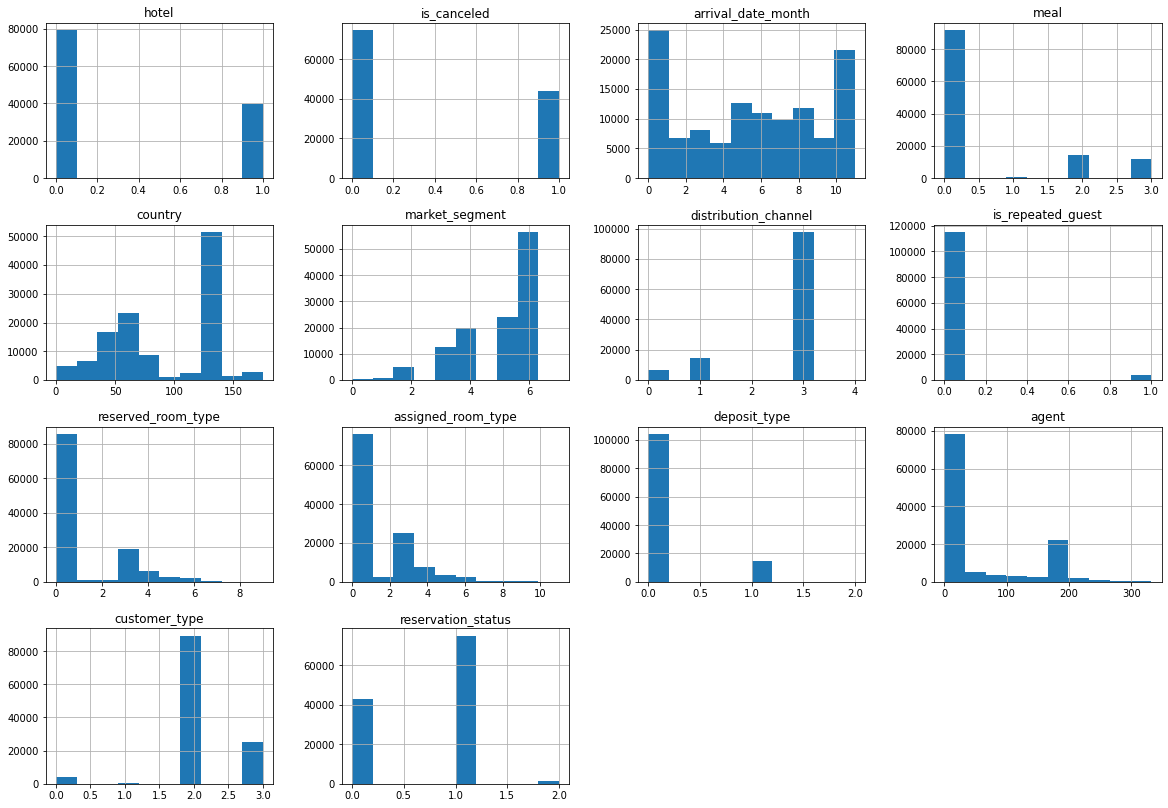

In [775]:
#ดูข้อมูลที่เป็นหมวดหมู่
hotel_clean_cat.copy().hist(figsize=(20,14))
plt.show()

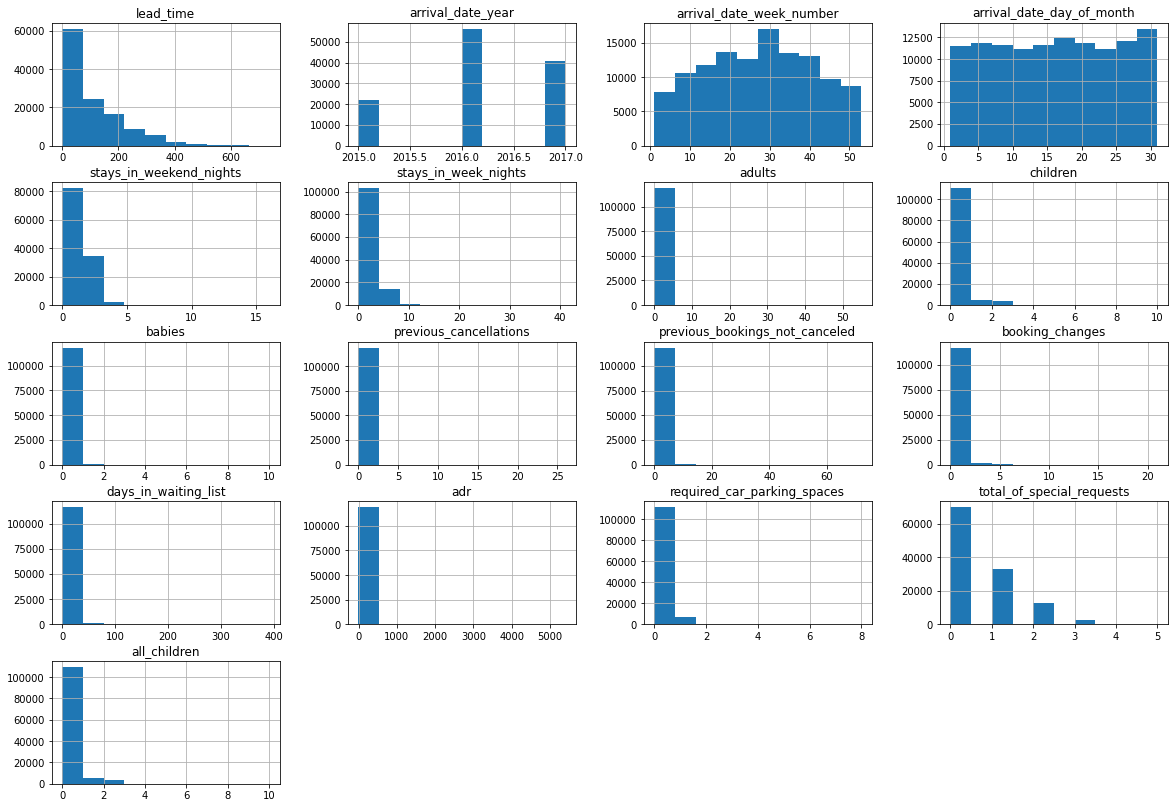

In [776]:
#ข้อมูลที่เป็นตัวเลข
hotel_clean_numerical.copy().hist(figsize=(20,14))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

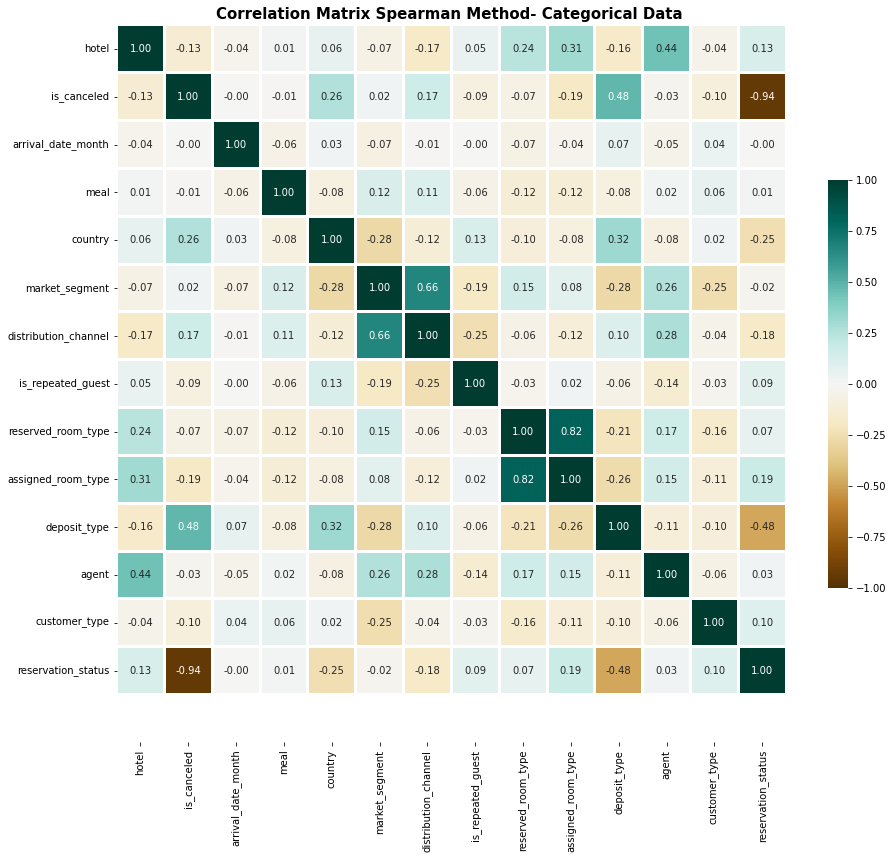

In [777]:
# ความสัมพันธ์ของข้อมูลหมวดหมู่
plt.figure(figsize=(15,15))
corr_categorical=hotel_clean_cat.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Pearson Method- Numerical Data ')

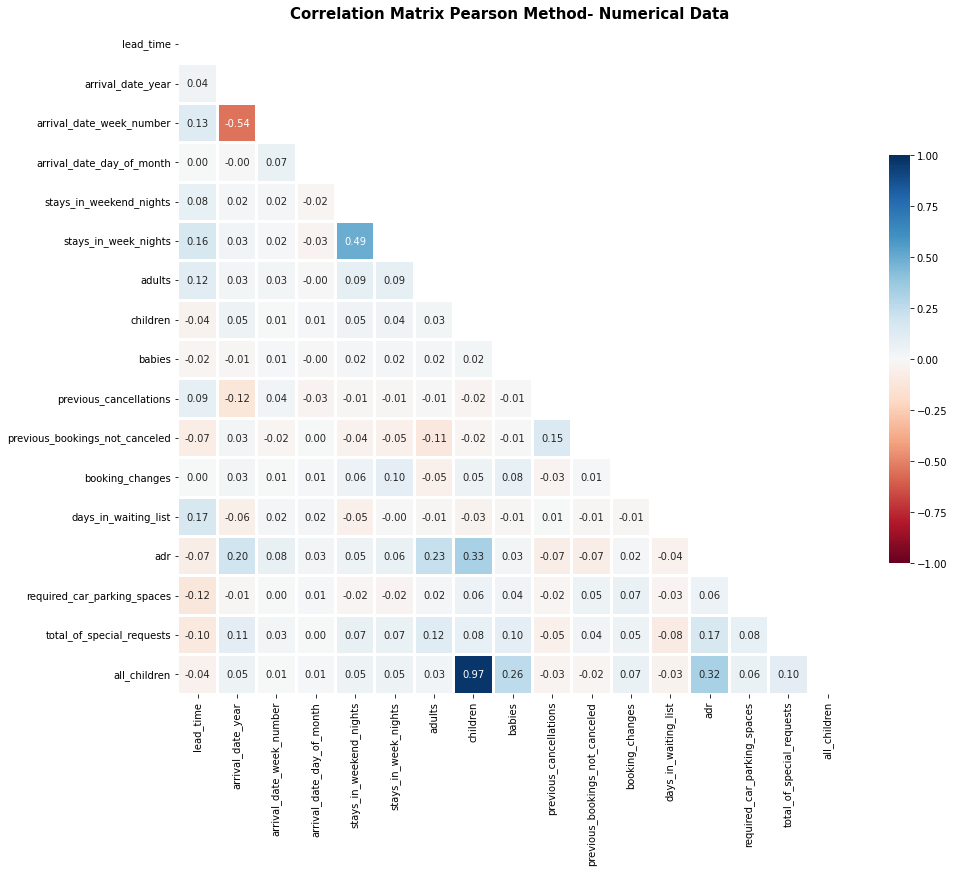

In [778]:
# ความสัมพันธ์ของข้อมูลตัวเลข

plt.figure(figsize=(15,15))
corr_numerical=hotel_clean_numerical.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

In [779]:
#ดูความหมายของคอลัมที่เราจะลบ
exam_df(hotel_clean[['reservation_status', 'children', 'reservation_status_date', 'babies', 'reserved_room_type']])

,feature,type,description,exam
0,reservation_status,object,สถานะการจอง,"['Check-Out', 'Canceled', 'No-Show']"
1,children,int64,จำนวนเด็ก,number
2,reservation_status_date,object,วันที่ สถานะการจอง,Date
3,babies,int64,จำนวนทารก,number
4,reserved_room_type,object,ประเภทห้องสำรอง,"['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P']"


In [780]:
# Drop Column ที่มีความมันมีความสัมพันธ์กันเกิน 80 %
# เหตุผลที่เราต้อง drop reservation_status_date เพราะเราไม่ได้ใช้ในเรื่องของวันที่อัพเดทสเตตัส
# เหตุผลที่เราต้อง drop children, babies เพราะเราได้สร้าง feature ใหม่ชื่อว่า all_children ขึ้นมาทดแทนแล้ว
# เหตุผลที่เราต้อง drop reservation_status เพราะมีค่าความสัมพันธ์กับ Feature เกิน 80%
# เหตุผลที่เราต้อง drop reserved_room_type เพราะค่าความสัมพันธ์กับ assigned_room_type เกิน 80% เราเลยเลือกตัว reserved_room_type เพราะเป็นการสำรองห้อง และเก็บห้องที่จองไว้
dropColunms = ['reservation_status', 'children', 'reservation_status_date', 'babies', 'reserved_room_type']
hotel_feature = hotel_feature.drop(dropColunms, axis=1)

# Modeling

---



In [781]:
# model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# แบ่งข้อมูล
from sklearn.model_selection import train_test_split, StratifiedKFold

# report
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix



In [782]:
def Modeling(model_select, X_train, X_test, y_train, y_test):
  # time_start = time.time()
  # recommendation = recommend.get_recommendations(name_cosine_sim)
  # time_end = time.time()
  # print(f"Name Recommendation : {round(time_end - time_start, 4)} s")

  if model_select == 'dtc':
    # Decision Tree Model Building
    model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                      min_samples_leaf = 4, max_features = 'auto', random_state=42)
    # time start
    time_start = time.time()
    # fit the model
    model.fit(X_train, y_train)
    # time stop
    time_end = time.time()
    time_total = round(time_end - time_start, 4)
    # Predict Model
    pred = model.predict(X_test)
    print('| Decision Tree Model |', f'Run Time : {time_total} s\n')
    print(classification_report(y_test, pred, target_names=['0','1']))
    plot_confusion_matrix(model, X_test, y_test)

    report = {'Model Name': 'Decision Tree', 
                    'Accuracy': accuracy_score(y_test, pred),
                    'Recall(0)': recall_score(y_test, pred, average=None)[0], 
                    'Recall(1)': recall_score(y_test, pred, average=None)[1], 
                    'Precision(0)': precision_score(y_test, pred, average=None)[0], 
                    'Precision(1)': precision_score(y_test, pred, average=None)[1], 
                    'F1 Score(0)':f1_score(y_test, pred, average=None)[0],
                    'F1 Score(1)':f1_score(y_test, pred, average=None)[1],
                    'Time(s)':time_total}
    return model, pred, report, time_total

  elif model_select == 'rf':
    # Random Forest Model Building
    model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                      n_estimators = 100, random_state=42, n_jobs=-1)
    # time start
    time_start = time.time()
    # fit the model
    estimator= model.fit(X_train, y_train)
    # time stop
    time_end = time.time()
    # Predict Model
    time_total = round(time_end - time_start, 4)
    pred= model.predict(X_test)
    print('| Random Forest Model |', f'Run Time : {time_total} s\n')
    print(classification_report(y_test, pred, target_names=['0','1']))
    plot_confusion_matrix(model, X_test, y_test)

    report = {'Model Name': 'Random Forest', 
                    'Accuracy': accuracy_score(y_test, pred),
                    'Recall(0)': recall_score(y_test, pred, average=None)[0], 
                    'Recall(1)': recall_score(y_test, pred, average=None)[1], 
                    'Precision(0)': precision_score(y_test, pred, average=None)[0], 
                    'Precision(1)': precision_score(y_test, pred, average=None)[1], 
                    'F1 Score(0)':f1_score(y_test, pred, average=None)[0],
                    'F1 Score(1)':f1_score(y_test, pred, average=None)[1],
                    'Time(s)':time_total}
    return model, pred, report, time_total

  elif model_select == 'etc':
    # Extra Treees Classsifier Model Building
    model = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split=2,
                                      n_estimators = 100, random_state=42)
    # time start
    time_start = time.time()
    # fit the model
    model.fit(X_train, y_train)
    # time stop
    time_end = time.time()
    time_total = round(time_end - time_start, 4)
    # Predict Model
    pred = model.predict(X_test)
    print('| Extra Treees Classsifier Model |', f'Run Time : {time_total} s\n')
    print(classification_report(y_test, pred, target_names=['0','1']))
    plot_confusion_matrix(model, X_test, y_test)

    report = {'Model Name': 'Extra Treees Classsifier', 
                    'Accuracy': accuracy_score(y_test, pred),
                    'Recall(0)': recall_score(y_test, pred, average=None)[0], 
                    'Recall(1)': recall_score(y_test, pred, average=None)[1], 
                    'Precision(0)': precision_score(y_test, pred, average=None)[0], 
                    'Precision(1)': precision_score(y_test, pred, average=None)[1], 
                    'F1 Score(0)':f1_score(y_test, pred, average=None)[0],
                    'F1 Score(1)':f1_score(y_test, pred, average=None)[1],
                    'Time(s)':time_total}
    return model, pred, report, time_total

  else:
    print("Not Fond")

## split

แบ่งข้อมูลเพื่อใช้สำหรับการเทรน

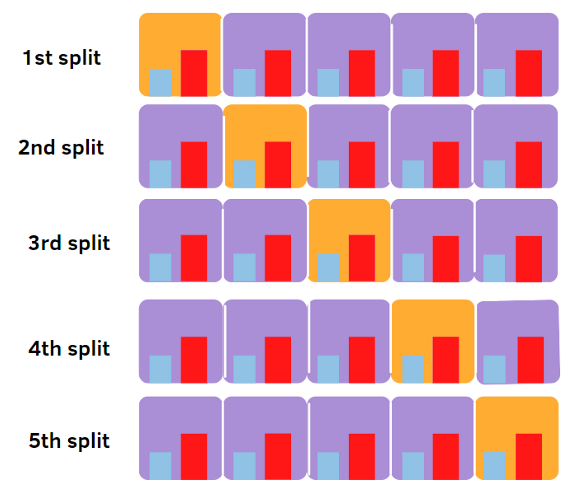

In [783]:
# คัดลอก data frame ใช้สำหรับการ เทรน model
hotel_model = hotel_feature.copy()

In [784]:
# เช็คข้อมูลก่อนเข้า Model
hotel_model.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children
0,1,0,342,2015,5,27,1,0,0,2,0,134,3,1,0,0,0,2,3,0,0,0,2,0.0,0,0,0
1,1,0,737,2015,5,27,1,0,0,2,0,134,3,1,0,0,0,2,4,0,0,0,2,0.0,0,0,0


In [785]:
# เช็ค สเตตัส กับ is cancle
def spilt_for_train(df):
  y = df['is_canceled']
  X = df.drop(['is_canceled'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Stratified K-Fold Cross Validation Method
  kfold_cv=StratifiedKFold(n_splits=4, shuffle=True)
  for train_index, test_index in kfold_cv.split(X,y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  return X, y, X_train, X_test, y_train, y_test

In [786]:
X, y, X_train, X_test, y_train, y_test = spilt_for_train(hotel_model)

## Brenchmark

### Modeling

| Decision Tree Model | Run Time : 0.1585 s

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     18686
           1       0.82      0.76      0.79     11039

    accuracy                           0.85     29725
   macro avg       0.84      0.83      0.84     29725
weighted avg       0.85      0.85      0.85     29725

| Random Forest Model | Run Time : 7.4721 s

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     18686
           1       0.87      0.79      0.83     11039

    accuracy                           0.88     29725
   macro avg       0.88      0.86      0.87     29725
weighted avg       0.88      0.88      0.88     29725

| Extra Treees Classsifier Model | Run Time : 6.1567 s

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     18686
           1       0.90      0.73      0.80     11039

    accuracy                        

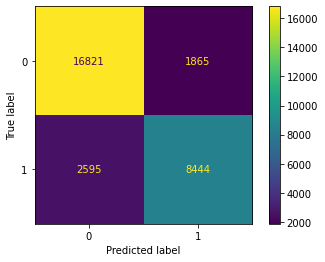

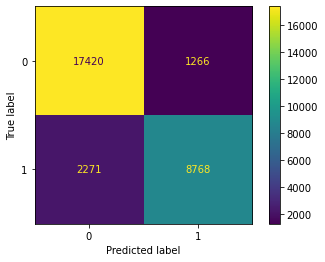

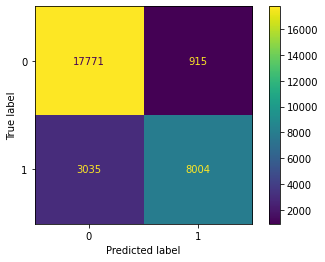

In [787]:
feature_a = []
#Decision Tree Model
dtc_model, dtc_pred, dtc_r, dtc_time = Modeling('dtc', X_train, X_test, y_train, y_test)
feature_a.append(dtc_r)

#Random Forest Model
rf_model, rf_pred, rf_r, rf_time = Modeling('rf', X_train, X_test, y_train, y_test)
feature_a.append(rf_r)


#Extra Treees Classsifier Model
etc_model, etc_pred, etc_r, etc_time = Modeling('etc', X_train, X_test, y_train, y_test)
feature_a.append(etc_r)

### Benchmark Model

In [788]:
report_model = pd.DataFrame(feature_a)
report_model.style.highlight_max(color = 'green', axis = 0)

,Model Name,Accuracy,Recall(0),Recall(1),Precision(0),Precision(1),F1 Score(0),F1 Score(1),Time(s)
0,Decision Tree,0.849958,0.900193,0.764924,0.866347,0.819090,0.882946,0.791081,0.158500
1,Random Forest,0.881009,0.932249,0.794275,0.884668,0.873829,0.907835,0.832155,7.472100
2,Extra Treees Classsifier,0.867115,0.951033,0.725066,0.854129,0.897410,0.899980,0.802084,6.156700




```
# เราจะเลือก Model ที่มีค่า Recall ที่เป็น 1 มากทีสุด

# เหตุผล
# เพราะว่าธุรกิจของเราจะได้รับผลกระทบมากที่สุดมาจากสาเหตุที่เราทำนายว่าลูกค้าจะไม่ยกเลิก(0) แต่ความเป็นจริงลูกค้านั้นยกเลิก(1) 
# ซึ่งอาจจะทำให้ธุระกิจนั้นเสียรายได้ ดังนั้นเราจึงเลือกใช้ model ที่ให้ recall สูงที่สุดเพื่อนำไป Tuning ต่อเพื่อให้ Model มีความความถูกต้องมากยิ่งขึ้น
# ในที่นี้เราเลือก Random Forest
```



## Feature Importances


#### หา Feature Importances

หา Feature ที่สำคัญ

In [789]:
# Score
importances = rf_model.feature_importances_

In [790]:
# คะแนน
importances

array([0.00761793, 0.12287514, 0.02565909, 0.01881144, 0.03293903,
       0.02806452, 0.01226063, 0.01987739, 0.00689636, 0.00828306,
       0.13121742, 0.06495042, 0.01249573, 0.00184687, 0.04226037,
       0.00392126, 0.02488249, 0.02084286, 0.17517505, 0.05768205,
       0.00177936, 0.02938886, 0.05303928, 0.02956125, 0.06435972,
       0.00331241])

In [791]:
# Columns
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'all_children'],
      dtype='object')

In [792]:
importances_df = pd.DataFrame({'feature': list(X.columns), 'score':list(importances)}).sort_values(by=['score'], ascending=False)
importances_df['cumsum'] = importances_df['score'].cumsum()
importances_df

,feature,score,cumsum
18,deposit_type,0.175175,0.175175
10,country,0.131217,0.306392
1,lead_time,0.122875,0.429268
11,market_segment,0.064950,0.494218
24,total_of_special_requests,0.064360,0.558578
19,agent,0.057682,0.616260
22,adr,0.053039,0.669299
14,previous_cancellations,0.042260,0.711559
4,arrival_date_week_number,0.032939,0.744498
23,required_car_parking_spaces,0.029561,0.774060


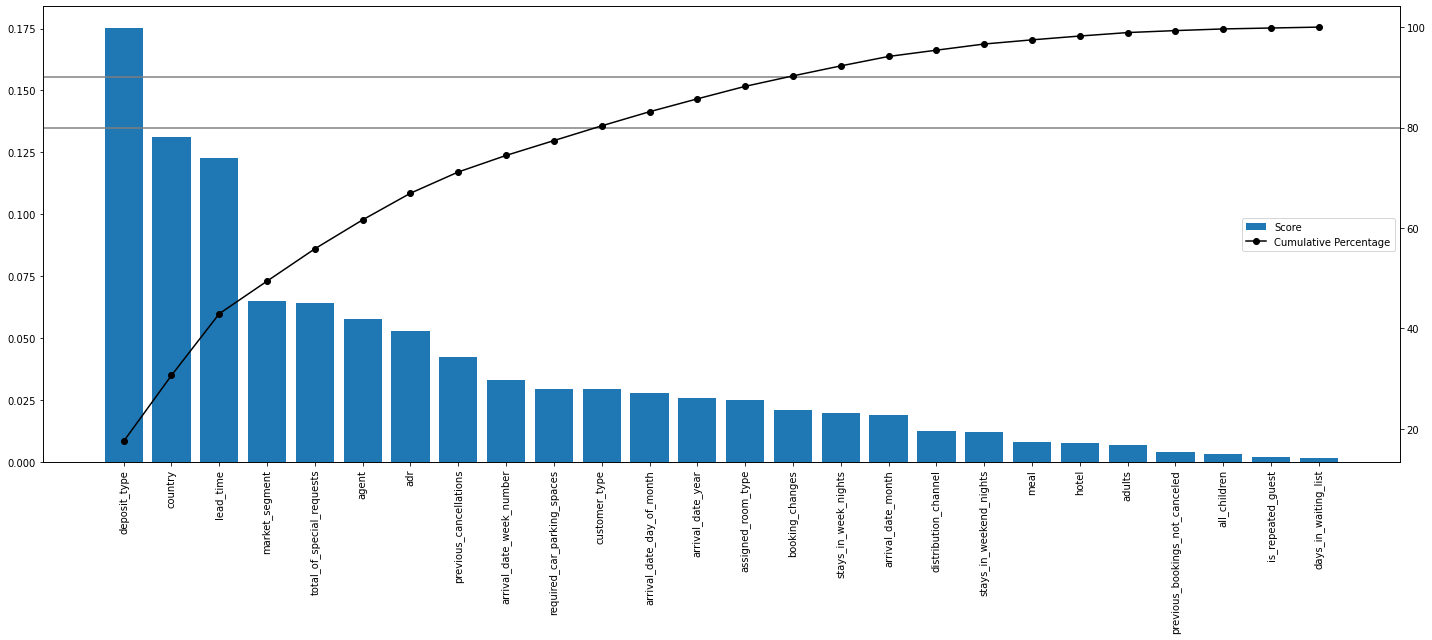

In [793]:
df = pd.DataFrame({
            'score': list(importances_df['score'].values),
            'feature': list(importances_df['feature'].values)})

score = 'score'
feature = 'feature'

df = df.sort_values(score, ascending=False)
df['cumulative_sum'] = df[score].cumsum()
df['cumulative_perc'] = 100*df['cumulative_sum']/df[score].sum()

df['demarcation'] = 100

title = 'Pareto Chart'

#กราฟ
plt.figure(figsize=(20, 9))

axes1 = plt.subplot()
b = axes1.bar(df[feature], df[score], label='Score')

plt.xticks(rotation=90)

# use twinx() function to create the second axis object “ax2”
axes2 = axes1.twinx()

p = axes2.plot(df[feature], df['cumulative_perc'], c='black', marker='o', zorder=5, label='Cumulative Percentage')

axes1.legend(handles=(b, p[0]), loc='center right')

plt.axhline(y=80, color='gray', linestyle='-')
plt.axhline(y=90, color='gray', linestyle='-')
plt.tight_layout()
plt.show()


สรุป Importances
```
# Feature ที่ข้อนข้างมีน้ำหนักมากที่สุดคือ Deposit_type รองลงมาคือ Country และอื่นๆ 
# ผมจึงเกิดคำถามว่าถ้าหากเราใช้ Feature น้อยลงจะทำให้มีความแม่นยำเพิ่มขึ้นหรือลดลง และความเร็วจะเพิ่มขึ้นหรือลดลง
# ดังนั้นเราจึงทดลองตัดที่ 90% ซึ่งจะมีทั้งหมด 15 Feature
# และทดลองตัดที่ 80% ซึ่งมีทั้งหมด 11 Feature
```



### ทดลองตัดที่ 90% กับ 3 Model

ดูรายละเอียดแต่ละ Feature ว่าแต่ละ Feature นั้นเป็นยังไง

In [794]:
target_for_90 = ['is_canceled','deposit_type','country','lead_time','total_of_special_requests','agent',
                 'market_segment','adr','previous_cancellations','arrival_date_week_number',
                 'customer_type','required_car_parking_spaces','arrival_date_day_of_month',
                 'arrival_date_year','assigned_room_type','stays_in_week_nights']
exam_df(hotel_clean[target_for_90])

,feature,type,description,exam
0,is_canceled,int64,ยกเลิกการจอง,"[0, 1]"
1,deposit_type,object,ประเภทเงินฝาก,"['No Deposit', 'Refundable', 'Non Refund']"
2,country,object,ประเทศผู้เข้าพัก,"['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CHN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', 'TMP', 'GLP', 'KEN', 'LIE', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN', 'BFA', 'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB', 'ABW', 'AIA', 'SLV', 'DMA', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']"
3,lead_time,int64,จำนวนวันที่จองก่อนเข้าพัก,number
4,total_of_special_requests,int64,จำนวนคำขอพิเศษที่ลูกค้าทำ (เช่น ขอเตียงคู่),number
5,agent,int64,ตัวแทน,number
6,market_segment,object,ส่วนทางการตลาด,"['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']"
7,adr,float64,ราคาเฉลี่ยในช่วงวัน,number
8,previous_cancellations,int64,จำนวนการจองก่อนหน้าลูกค้าจะยกเลิกการจอง,number
9,arrival_date_week_number,int64,สัปดาห์ของปีที่เข้าพัก,number




```
# ข้อมูลที่เราดึงมาแสดงตัวอย่างนี้ เป็นข้อมูลหลังจากผ่านขั้นตอนการ Cleaning มาแล้ว จะดึงมาทั้งหมด 16 Feature
# ซึ่งจะเห็นได้ว่ามีข้อมูลที่เป็น หมวดหมู่ถึง 7 Feature (รวม Agent ด้วย และ stays_in_week_nights)
# และข้อมูลที่เป็น ตัวเลขทั้งหมด 8 Feature
# และเป็นคำตอบ 1 Feature
```



#### Train Model

In [795]:
#คัดลอก Data Frame ตั้งแต่ตอนหลังทำขั้นตอน Feature Engineer
model_90_df = hotel_feature.copy()

In [796]:
model_90_df[target_for_90].head(1)

,is_canceled,deposit_type,country,lead_time,total_of_special_requests,agent,market_segment,adr,previous_cancellations,arrival_date_week_number,customer_type,required_car_parking_spaces,arrival_date_day_of_month,arrival_date_year,assigned_room_type,stays_in_week_nights
0,0,0,134,342,0,0,3,0.0,0,27,2,0,1,2015,2,0


In [797]:
# X, y, X_train, X_test, y_train, y_test = spilt_for_train(hotel_model)
X_90, y_90, X_train_90, X_test_90, y_train_90, y_test_90 = spilt_for_train(model_90_df)

| Decision Tree Model | Run Time : 0.1601 s

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     18686
           1       0.81      0.76      0.78     11039

    accuracy                           0.84     29725
   macro avg       0.84      0.83      0.83     29725
weighted avg       0.84      0.84      0.84     29725

| Random Forest Model | Run Time : 7.4735 s

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     18686
           1       0.88      0.79      0.83     11039

    accuracy                           0.88     29725
   macro avg       0.88      0.86      0.87     29725
weighted avg       0.88      0.88      0.88     29725

| Extra Treees Classsifier Model | Run Time : 6.1679 s

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     18686
           1       0.89      0.72      0.80     11039

    accuracy                        

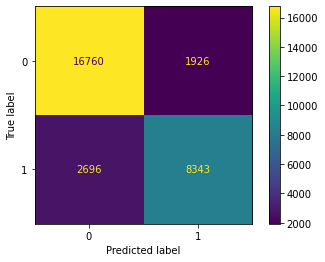

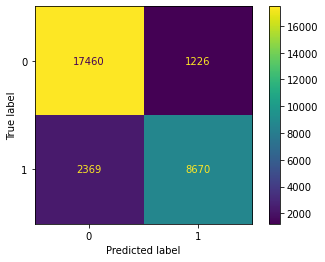

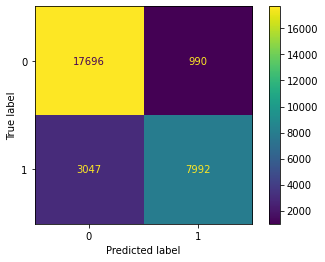

In [798]:
#Train Model
feature_b = []

#Dicision Tree
dtc_model_90, dtc_pred_90, dtc_r_90, dtc_time_90 = Modeling('dtc', X_train_90, X_test_90, y_train_90, y_test_90)
feature_b.append(dtc_r_90)

#Random Forest
rf_model_90, rf_pred_90, rf_r_90, rf_time_90 = Modeling('rf',  X_train_90, X_test_90, y_train_90, y_test_90)
feature_b.append(rf_r_90)

#Extra Trees
etc_model_90, etc_pred_90, etc_r_90, etc_time_90 = Modeling('etc',  X_train_90, X_test_90, y_train_90, y_test_90)
feature_b.append(etc_r_90)

#### ผลลัพธ์

ผลลัพธ์ 11 Feature

In [799]:
report_model_90 = pd.DataFrame(feature_b)
report_model_90.style.highlight_max(color = 'green', axis = 0)

,Model Name,Accuracy,Recall(0),Recall(1),Precision(0),Precision(1),F1 Score(0),F1 Score(1),Time(s)
0,Decision Tree,0.844508,0.896928,0.755775,0.861431,0.812445,0.878821,0.783086,0.160100
1,Random Forest,0.879058,0.934389,0.785397,0.880529,0.876112,0.906660,0.828278,7.473500
2,Extra Treees Classsifier,0.864188,0.947019,0.723979,0.853107,0.889780,0.897613,0.798362,6.167900




```
# เราจะ Focus ไปที่ Recall ที่เป็น 1 เท่านั้น
# และเมื่อเราได้ รันทั้ง 3 Model โดยใช้ Feature ทั้งหมด 16 Feature(รวมทั้ง Feature คำตอบ)
# Model ที่มีค่า Recall ที่เป็น 1 มากที่สุดคือ Random Forest
```



### ทดลองตัดที่ 80% กับ 3 Model

In [800]:
target_for_80 = ['is_canceled','deposit_type','country','lead_time','total_of_special_requests','agent',
                 'market_segment','adr','previous_cancellations','arrival_date_week_number',
                 'customer_type','required_car_parking_spaces']
exam_df(hotel_clean[target_for_80])

,feature,type,description,exam
0,is_canceled,int64,ยกเลิกการจอง,"[0, 1]"
1,deposit_type,object,ประเภทเงินฝาก,"['No Deposit', 'Refundable', 'Non Refund']"
2,country,object,ประเทศผู้เข้าพัก,"['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CHN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', 'TMP', 'GLP', 'KEN', 'LIE', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN', 'BFA', 'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB', 'ABW', 'AIA', 'SLV', 'DMA', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']"
3,lead_time,int64,จำนวนวันที่จองก่อนเข้าพัก,number
4,total_of_special_requests,int64,จำนวนคำขอพิเศษที่ลูกค้าทำ (เช่น ขอเตียงคู่),number
5,agent,int64,ตัวแทน,number
6,market_segment,object,ส่วนทางการตลาด,"['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']"
7,adr,float64,ราคาเฉลี่ยในช่วงวัน,number
8,previous_cancellations,int64,จำนวนการจองก่อนหน้าลูกค้าจะยกเลิกการจอง,number
9,arrival_date_week_number,int64,สัปดาห์ของปีที่เข้าพัก,number




```
# ข้อมูลที่เราดึงมาแสดงตัวอย่างนี้ เป็นข้อมูลหลังจากผ่านขั้นตอนการ Cleaning มาแล้ว เราจะเลือกมาทั้งหมด 12 Feature
# ซึ่งจะเห็นได้ว่ามีข้อมูลที่เป็น หมวดหมู่ถึง 5 Feature
# และข้อมูลที่เป็น ตัวเลขทั้งหมด 6 Feature
# และเป็นคำตอบ 1 Feature
```



#### Train Model

In [801]:
#คัดลอก Data Frame ตั้งแต่ตอนหลังทำขั้นตอน Feature Engineer
model_80_df = hotel_feature.copy()

In [802]:
model_80_df[target_for_80].head(1)

,is_canceled,deposit_type,country,lead_time,total_of_special_requests,agent,market_segment,adr,previous_cancellations,arrival_date_week_number,customer_type,required_car_parking_spaces
0,0,0,134,342,0,0,3,0.0,0,27,2,0


In [803]:
# X, y, X_train, X_test, y_train, y_test = spilt_for_train(hotel_model)
X_80, y_80, X_train_80, X_test_80, y_train_80, y_test_80 = spilt_for_train(model_80_df)

| Decision Tree Model | Run Time : 0.1568 s

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     18686
           1       0.82      0.77      0.80     11039

    accuracy                           0.85     29725
   macro avg       0.85      0.84      0.84     29725
weighted avg       0.85      0.85      0.85     29725

| Random Forest Model | Run Time : 7.4788 s

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     18686
           1       0.88      0.79      0.83     11039

    accuracy                           0.88     29725
   macro avg       0.88      0.86      0.87     29725
weighted avg       0.88      0.88      0.88     29725

| Extra Treees Classsifier Model | Run Time : 6.0988 s

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     18686
           1       0.89      0.73      0.80     11039

    accuracy                        

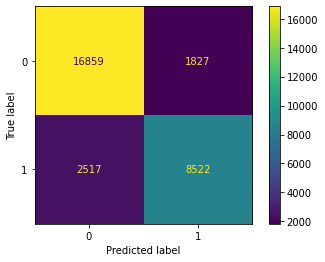

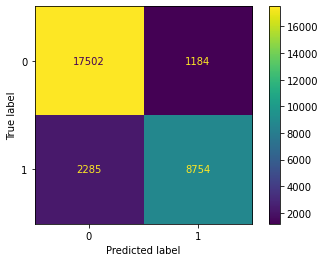

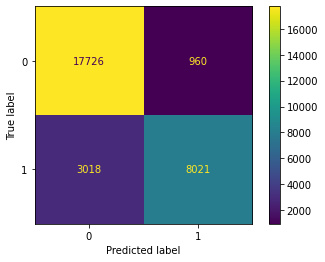

In [804]:
#Train Model

feature_c = []

#Dicision Tree
dtc_model_80, dtc_pred_80, dtc_r_80, dtc_time_80 = Modeling('dtc', X_train_80, X_test_80, y_train_80, y_test_80)
feature_c.append(dtc_r_80)

#Random Forest
dtc_model_80, dtc_pred_80, dtc_r_80, dtc_time_80 = Modeling('rf', X_train_80, X_test_80, y_train_80, y_test_80)
feature_c.append(dtc_r_80)

#Extra Trees
dtc_model_80, dtc_pred_80, dtc_r_80, dtc_time_80 = Modeling('etc', X_train_80, X_test_80, y_train_80, y_test_80)
feature_c.append(dtc_r_80)

#### ผลลัพ

In [805]:
report_model_80 = pd.DataFrame(feature_c)
report_model_80.style.highlight_max(color = 'green', axis = 0)

,Model Name,Accuracy,Recall(0),Recall(1),Precision(0),Precision(1),F1 Score(0),F1 Score(1),Time(s)
0,Decision Tree,0.853860,0.902226,0.771990,0.870097,0.823461,0.885870,0.796895,0.156800
1,Random Forest,0.883297,0.936637,0.793007,0.884520,0.880861,0.909833,0.834628,7.478800
2,Extra Treees Classsifier,0.866173,0.948625,0.726606,0.854512,0.893108,0.899112,0.801299,6.098800




```
# เราจะ Focus ไปที่ Recall ที่เป็น 1 เท่านั้น
# และเมื่อเราได้ รันทั้ง 3 Model โดยใช้ Feature ทั้งหมด 12 Feature(รวมทั้ง Feature คำตอบ)
# Model ที่มีค่า Recall ที่เป็น 1 มากที่สุดคือ Random Forest
```





---



### สรุปผล

เพื่อให้การวัดผลได้เข้าใจง่าย จะกำหนดให้ 


*   Feature A : คือการใช้ Feature ทั้งหมดหลังจากการทำขั้นตอน Feature Engineer 
*   Feature B : คือการใช้ Feature ทั้งหมด 16(รวม Feature คำตอบ) หลังจากทำ Feature Importances และตัดที่ 90%
*   Feature C : คือการใช้ Feature ทั้งหมด 11(รวม Feature คำตอบ) หลังจากทำ Feature Importances และตัดที่ 80%



Feature A | Feature ทั้งหมดหลังจากการทำขั้นตอน Feature Engineer 

---



In [806]:
report_model = pd.DataFrame(feature_a)
report_model.style.highlight_max(color = 'green', axis = 0)

,Model Name,Accuracy,Recall(0),Recall(1),Precision(0),Precision(1),F1 Score(0),F1 Score(1),Time(s)
0,Decision Tree,0.849958,0.900193,0.764924,0.866347,0.819090,0.882946,0.791081,0.158500
1,Random Forest,0.881009,0.932249,0.794275,0.884668,0.873829,0.907835,0.832155,7.472100
2,Extra Treees Classsifier,0.867115,0.951033,0.725066,0.854129,0.897410,0.899980,0.802084,6.156700


Feature B | ใช้ Feature ทั้งหมด 16(รวม Feature คำตอบ) หลังจากทำ Feature Importances และตัดที่ 90%

---



In [807]:
report_model_90 = pd.DataFrame(feature_b)
report_model_90.style.highlight_max(color = 'green', axis = 0)

,Model Name,Accuracy,Recall(0),Recall(1),Precision(0),Precision(1),F1 Score(0),F1 Score(1),Time(s)
0,Decision Tree,0.844508,0.896928,0.755775,0.861431,0.812445,0.878821,0.783086,0.160100
1,Random Forest,0.879058,0.934389,0.785397,0.880529,0.876112,0.906660,0.828278,7.473500
2,Extra Treees Classsifier,0.864188,0.947019,0.723979,0.853107,0.889780,0.897613,0.798362,6.167900


Feature C | ใช้ Feature ทั้งหมด 11(รวม Feature คำตอบ) หลังจากทำ Feature Importances และตัดที่ 80%

---



In [808]:
report_model_80 = pd.DataFrame(feature_c)
report_model_80.style.highlight_max(color = 'green', axis = 0)

,Model Name,Accuracy,Recall(0),Recall(1),Precision(0),Precision(1),F1 Score(0),F1 Score(1),Time(s)
0,Decision Tree,0.853860,0.902226,0.771990,0.870097,0.823461,0.885870,0.796895,0.156800
1,Random Forest,0.883297,0.936637,0.793007,0.884520,0.880861,0.909833,0.834628,7.478800
2,Extra Treees Classsifier,0.866173,0.948625,0.726606,0.854512,0.893108,0.899112,0.801299,6.098800


สรุป

---



เหตุผลที่ผมนำมาตัดนะครับ เพื่อทดสอบสมมุตฐานของผมว่าการที่มี Feature ที่ลดลงนั้นมีผลต่อความแม่นยำหรือไม่ และมีความเร็วที่เร็วขึ้นหรือไม่



> ผลสรุปคือใช้ Feature น้อยลง ทำให้ค่าความถูกต้องน้อยลง และยังใช้เวลาที่เพิ่มขึ้น




```
# ผมจะให้ Feature A คือ Model ที่ใช้ Feature ทั้งหมด
# ผมจะให้ Feature B คือ Model ที่ใช้ 16 Feature
# ผมจะให้ Feature C คือ Model ที่ใช้ 11 Feature

# เมื่อผมนำ Feature A มาเทียบกับ Feature B และ Feature C
# จะเห็นได้ว่า Feature A Recall (1) = 0.794275	(Win)
#                 Feature B Recall (1) = 0.785397 
#                 Feature C Recall (1) = 0.793007
ซึ่งผมจะ Focus ที่ค่า Recall ที่เป็น 1 ดังนั้นผมจึงเลือก Feature A เพื่อทำขั้นตอน Hyperparameters Tuning ต่อ
```

## Hyperparameters Tuning



In [620]:
# Turning
from sklearn.model_selection import GridSearchCV

In [621]:
# 'n_estimators': จำนวนต้นไม้ 
#  'max_features': วิธีการ
#  'max_depth': ความลึกของต้นไม้
#  'bootstrap': [True, False]}

# param_grid={
#     'n_estimators': [100, 500], 
#     'max_features': ['auto', 'log2'], 
#     'max_depth': [4, 6, 8], 
#     'criterion': ['gini', 'entropy']
#     }

# grid_search = GridSearchCV(model_rf, param_grid, cv=10, scoring='recall')
# grid_search.fit(X_train, y_train)
# grid_search.best_estimator_

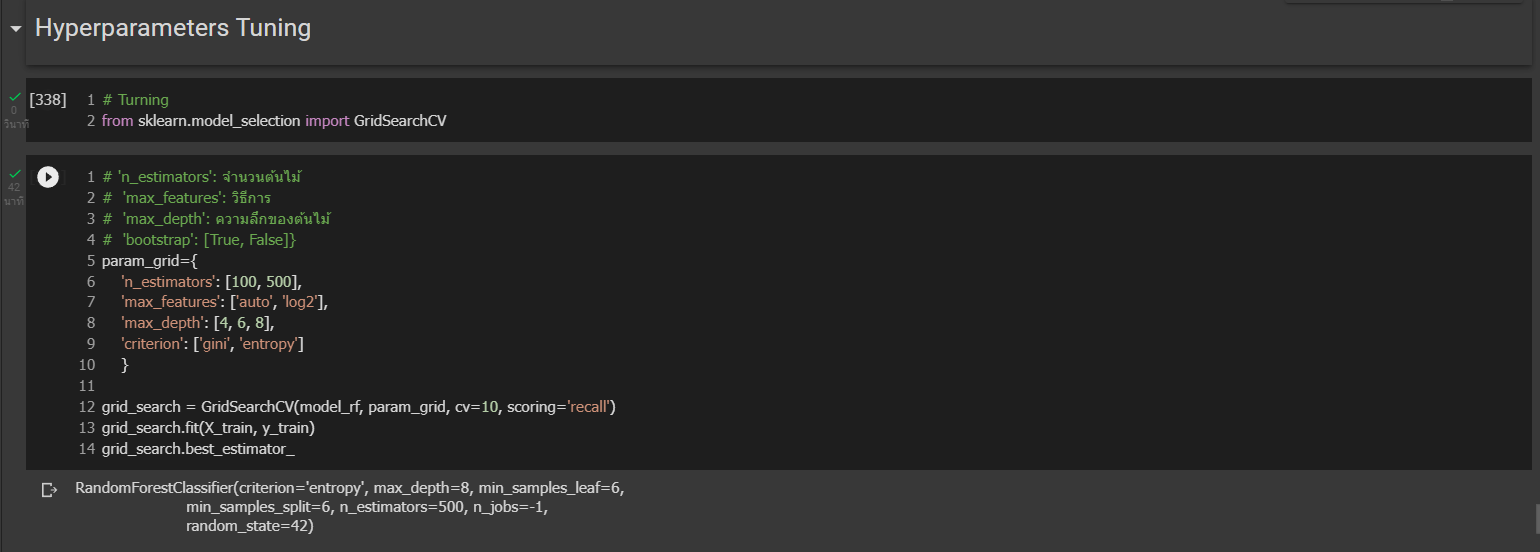
> ผลลัพธ์จากการ Truning
```
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=500, n_jobs=-1,
                       random_state=42)
```



In [622]:
# model_turning = grid_search.best_estimator_

In [623]:
#เนื่องจากเราได้หาทำการทำ Hyperparameters Tuning แล้ว และได้ Model ที่ดีที่สุดออกมาจึงนำค่ามาใช้งานเพื่อไม่ให้รันโค้ดซ้ำ
model_turning = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [624]:
# เทรน Model 
time_start = time.time()
# fit the model
model_turning.fit(X_train, y_train)
# time stop
time_end = time.time()
time_total = round(time_end - time_start, 4)


In [625]:
#วัดผล
print(classification_report(y_test, model_turning.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     18686
           1       0.90      0.64      0.74     11039

    accuracy                           0.84     29725
   macro avg       0.86      0.80      0.81     29725
weighted avg       0.85      0.84      0.83     29725





> เปรียบเทียบ




>confusion_matrix ของ random forest ก่อนทำ Hyperparameters Tuning<br>
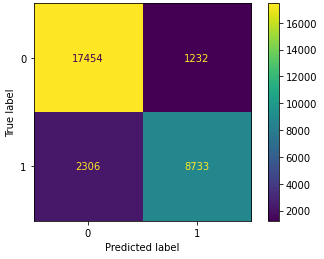


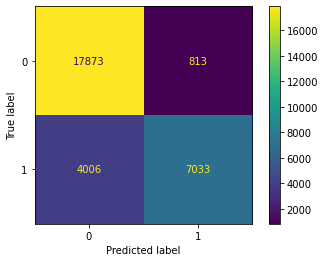

In [626]:
# confusion_matrix ของ random forest หลังทำ Hyperparameters Tuning
plot_confusion_matrix(model_turning, X_test, y_test)

In [627]:

tuning_report = []
tuning_report.append(rf_r)
tuning_report.append({'Model Name': 'RandomForestClassifier Tuning', 
                    'Accuracy': accuracy_score(y_test, model_turning.predict(X_test)),
                    'Recall(0)': recall_score(y_test, model_turning.predict(X_test), average=None)[0], 
                    'Recall(1)': recall_score(y_test, model_turning.predict(X_test), average=None)[1], 
                    'Precision(0)': precision_score(y_test, model_turning.predict(X_test), average=None)[0], 
                    'Precision(1)': precision_score(y_test, model_turning.predict(X_test), average=None)[1], 
                    'F1 Score(0)':f1_score(y_test, model_turning.predict(X_test), average=None)[0],
                    'F1 Score(1)':f1_score(y_test, model_turning.predict(X_test), average=None)[1],
                    'Time(s)': time_total})


reports_model_tuning = pd.DataFrame(tuning_report)
reports_model_tuning.style.highlight_max(color = 'green', axis = 0)

,Model Name,Accuracy,Recall(0),Recall(1),Precision(0),Precision(1),F1 Score(0),F1 Score(1),Time(s)
0,Random Forest,0.880841,0.936637,0.786394,0.881269,0.879980,0.908110,0.830559,7.380200
1,RandomForestClassifier Tuning,0.837881,0.956491,0.637105,0.816902,0.896380,0.881203,0.744824,21.767800



>ผลลัพธ์หลังจากการทำ Hyperparameters Tuning

```
ผลปรากฏว่าค่า Recall 0 : นั้นเพิ่มขึ้น ส่วนค่า Recall 1 นั้นลดลง

จะเห็นได้ว่าใน confusion_matrix ช่อง predict 0 true 1 นั้นมีค่าเพิ่มขึ้นจากเดิม ซึ่งไม่ตรงกับเป้าหมายของเรา

จึงเห็นได้ว่าเราอาจจะจูนไม่ถูกจุดเลยทำให้ค่า Recall 1 นั้นลดลง ดังนั้นเราจึงขอกลับไปใช้ Model เดิมในตอนที่ยังไม่ Turnning จนกว่าเราจะหาวิธีจูนค่า predict 0 true 1 ให้มันลดน้อยลงกว่าเดิม

```



#### การแบ่งอัตราส่วนของข้อมูล


In [628]:
def cut_ratio(model, x_test, y_test, target):
  prid_ratio = model.predict_proba(x_test)
  proba_df = pd.DataFrame(prid_ratio, columns=['0','1'])
  y_ratio = proba_df['1'].apply(lambda x: 1 if x > target else 0)
  return y_ratio

def report_ratio(model, x_test, y_test, target):
  y_ratio = cut_ratio(model, x_test, y_test, target)
  print(classification_report(y_test, y_ratio))
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))
  sns.heatmap(confusion_matrix(y_test, y_ratio) ,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([2,0])
  ax[0].set_title("Random Forest", weight='bold')
  ax[0].set_xlabel('Predicted Labels')
  ax[0].set_ylabel('Actual Labels')

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     18686
           1       0.84      0.84      0.84     11039

    accuracy                           0.88     29725
   macro avg       0.87      0.87      0.87     29725
weighted avg       0.88      0.88      0.88     29725



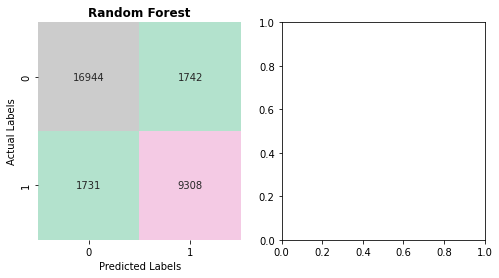

In [629]:
# ผมจะตัดที่ 42 เพื่อให้ค่า precision และ recall นั้นสมดุลกัน
report_ratio(rf_model, X_test, y_test, 0.42)



```
# ดูว่าหากแบ่งที่ 0.42 จะได้ค่า recall ที่เพิ่มขึ้นหรือไม่ เมื่อผมเห็นแล้วว่าเพิ่มขึ้นดังนั้น model ของผมจะตัดที่ 0.42
```



#Pipeline

In [630]:
class PipeLine():
    def __init__(self):
      self.mapping = {}
      self.features = ['hotel', 'arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','assigned_room_type','deposit_type','agent','customer_type']
      self.dropColunms = ['reservation_status', 'children', 'reservation_status_date','babies','reserved_room_type']

    def data_cleaning(self, data):
      nan_replacements = {"children": 0, "agent": 0}
      data = data.fillna(nan_replacements)
      data.dropna(subset = ["country"], inplace=True)
      data.drop(['company'], axis =1,inplace=True)
      data["meal"].replace("Undefined", "SC", inplace=True)
      data['agent']= data['agent'].astype(int)
      data['children']= data['children'].astype(int)
      data["country"].replace("CN", "CHN", inplace=True)
      return data

    def feature_engineer(self, data):
      data['all_children'] = data['children'] + data['babies']
      data = data.drop(self.dropColunms, axis=1)
      return data

    def fit(self, data):
      for col in self.features:
          self.mapping[col] = LabelEncoder().fit(data[col])
      return data

    def transform(self, data):
      for col in self.features:
          data[col] = self.mapping[col].transform(data[col])
      return data

    def build_trian(self, data):
      self.dataset = data.copy()
      self.dataset = self.data_cleaning(self.dataset)
      self.dataset = self.feature_engineer(self.dataset)
      self.dataset = self.fit(self.dataset)
      self.dataset = self.transform(self.dataset)
      return self.dataset

    def build_test(self, data):
      self.dataset = data.copy()
      self.dataset = self.data_cleaning(self.dataset)
      self.dataset = self.feature_engineer(self.dataset)
      self.dataset = self.transform(self.dataset)
      self.dataset.drop(['is_canceled'], axis =1,inplace=True)
      return self.dataset


ทดลอง trian ข้อมูลจาก pipeline

In [631]:
# คัดลอกข้อมูล Dataframe ต้นฉบับ เพื่อนำมาใช้ในการ fit ข้อมูลใน pipeline
hotel_test = hotel_csv.copy()

In [632]:
#สร้าง pipeline เพื่อที่จะนำมาใช้งาน
# การที่ต้อง build_trian ก่อนเพื่อให้ pipeline fit ข้อมูลที่เป็น ข้อมูลแบบหมวดหมู่เก็บไว้ก่อน
# ก่อนที่จะนำข้อมูลมา tranform เพื่อเอาไปเทรน หรือเทส ข้อมูลจาก pipeline
# hotel_train จริงๆไม่ต้องมีค่ามารับก็ได้ แต่เพื่อให้เห็นภาพตัวอย่างว่ามันสามารถนำไปใช้งานต่อได้
pipe = PipeLine()
hotel_train = pipe.build_trian(hotel_test)
hotel_train.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children
0,1,0,342,2015,5,27,1,0,0,2,0,134,3,1,0,0,0,2,3,0,0,0,2,0.0,0,0,0
1,1,0,737,2015,5,27,1,0,0,2,0,134,3,1,0,0,0,2,4,0,0,0,2,0.0,0,0,0


> สร้างข้อมูลตัวอย่างเพื่อทดสอบ

In [633]:
# Create df
test_df = pd.DataFrame({'hotel':'Resort Hotel', 
  'is_canceled':0, 
  'lead_time':368, 
  'arrival_date_year':2015,
  'arrival_date_month':'July', 
  'arrival_date_week_number':27,
  'arrival_date_day_of_month':3, 
  'stays_in_weekend_nights':3,
  'stays_in_week_nights':7, 
  'adults':2, 
  'children':0, 
  'babies':0, 
  'meal':'BB',
  'country':'PRT', 
  'market_segment':'Offline TA/TO', 
  'distribution_channel':'TA/TO',
  'is_repeated_guest':0, 
  'previous_cancellations':0,
  'previous_bookings_not_canceled':0, 
  'reserved_room_type':'A',
  'assigned_room_type':'A', 
  'booking_changes':0, 
  'deposit_type':'No Deposit', 
  'agent':40,
  'company':np.nan, 
  'days_in_waiting_list':0, 
  'customer_type':'Contract', 
  'adr':55.68,
  'required_car_parking_spaces':0, 
  'total_of_special_requests':0,
  'reservation_status':'Cancled', 
  'reservation_status_date':'2015-07-19'},index=[0])

In [634]:
# เตรียมข้อมูล ก่อนเข้า Model
pipe.build_test(test_df)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children
0,1,368,2015,5,27,3,3,7,2,0,134,5,3,0,0,0,0,0,0,39,0,0,55.68,0,0,0


In [635]:
# ลอง predict ข้อมูลตัวอย่าง
# rf_turning.predict_proba(pipe.build_test(test_df))
# model_turning.predict_proba(pipe.build_test(test_df))[0][1]
rf_model.predict_proba(pipe.build_test(test_df))[0]

array([0.28605457, 0.71394543])

In [636]:
#ลอง predict ข้อมูลตัวอย่าง
# rf_turning.predict(pipe.build_test(test_df))
# model_turning.predict(pipe.build_test(test_df))
rf_model.predict(pipe.build_test(test_df))

array([1], dtype=int64)

In [637]:
# สร้าง Function เพื่อใช้ในการแปลงข้อมูลในตารางให้พร้อมนำไปเทสใน App
def convertDataToListForTest(df):
  data_test = [[] for x in range(int(df.shape[0]))]
  for x in list(df.columns):
    if x != 'is_canceled':
      for i in range(int(df.shape[0])):
        data_test[i].append(df[x].values[i])
  return data_test



> ข้อมูลตัวอย่าง ไม่ยกเลิก



In [638]:
#เลือกคอลัมเพื่อนำข้อมูลมาเทสกับตัว app
target_feature = ['is_canceled','hotel','lead_time','arrival_date_year','arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','assigned_room_type','booking_changes','deposit_type','agent','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests']
test_data0 = hotel_clean.loc[hotel_clean['is_canceled'] == 0][target_feature].head(3).copy()
test_data0

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,July,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,0,0,Transient,0.0,0,0
1,0,Resort Hotel,737,2015,July,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,0,0,Transient,0.0,0,0
2,0,Resort Hotel,7,2015,July,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,C,0,No Deposit,0,0,Transient,75.0,0,0


In [639]:
test_data0_list = convertDataToListForTest(test_data0)
print(test_data0_list)

[['Resort Hotel', 342, 2015, 'July', 1, 0, 0, 2, 0, 0, 'BB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 3, 'No Deposit', 0, 0, 'Transient', 0.0, 0, 0], ['Resort Hotel', 737, 2015, 'July', 1, 0, 0, 2, 0, 0, 'BB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 4, 'No Deposit', 0, 0, 'Transient', 0.0, 0, 0], ['Resort Hotel', 7, 2015, 'July', 1, 0, 1, 1, 0, 0, 'BB', 'GBR', 'Direct', 'Direct', 0, 0, 0, 'C', 0, 'No Deposit', 0, 0, 'Transient', 75.0, 0, 0]]


> ข้อมูลตัวอย่าง ไม่ยกเลิก

In [640]:
#เลือกคอลัมเพื่อนำข้อมูลมาเทสกับตัว app
target_feature = ['is_canceled','hotel','lead_time','arrival_date_year','arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','assigned_room_type','booking_changes','deposit_type','agent','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests']
test_data1 = hotel_clean.loc[hotel_clean['is_canceled'] == 1][target_feature].head(3).copy()
test_data1

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
8,1,Resort Hotel,85,2015,July,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,0,No Deposit,240,0,Transient,82.0,0,1
9,1,Resort Hotel,75,2015,July,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,0,No Deposit,15,0,Transient,105.5,0,0
10,1,Resort Hotel,23,2015,July,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,0,No Deposit,240,0,Transient,123.0,0,0


In [641]:
test_data1_list = convertDataToListForTest(test_data1)
print(test_data1_list)

[['Resort Hotel', 85, 2015, 'July', 1, 0, 3, 2, 0, 0, 'BB', 'PRT', 'Online TA', 'TA/TO', 0, 0, 0, 'A', 0, 'No Deposit', 240, 0, 'Transient', 82.0, 0, 1], ['Resort Hotel', 75, 2015, 'July', 1, 0, 3, 2, 0, 0, 'HB', 'PRT', 'Offline TA/TO', 'TA/TO', 0, 0, 0, 'D', 0, 'No Deposit', 15, 0, 'Transient', 105.5, 0, 0], ['Resort Hotel', 23, 2015, 'July', 1, 0, 4, 2, 0, 0, 'BB', 'PRT', 'Online TA', 'TA/TO', 0, 0, 0, 'E', 0, 'No Deposit', 240, 0, 'Transient', 123.0, 0, 0]]


# Deployment

In [642]:
!pip install gradio -q

In [643]:
import gradio as gr

In [644]:
from datetime import datetime
def createWeekNumber(year, month, day):
    date = f"{year}-{month}-{day}"
    dt = datetime.strptime(date, '%Y-%B-%d')
    return int(dt.strftime('%U'))+1

def sortCountry(countryMap):
  listCountry = countryMap.copy()
  return listCountry.sort()

In [646]:
def predict_booking(hotel, lead_time, arrival_date_year, arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,
                    stays_in_week_nights,adults,children, babies, meal, country, market_segment, distribution_channel,is_repeated_guest,
                    previous_cancellations, previous_bookings_not_canceled, assigned_room_type, booking_changes,
                    deposit_type,agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests):
  input_df = pd.DataFrame({'hotel':hotel, 
    'is_canceled':0,
    'lead_time':lead_time, 
    'arrival_date_year':arrival_date_year,
    'arrival_date_month':arrival_date_month,

    'arrival_date_week_number':createWeekNumber(arrival_date_year,arrival_date_month,arrival_date_day_of_month),

    'arrival_date_day_of_month':arrival_date_day_of_month,
    'stays_in_weekend_nights':stays_in_weekend_nights,
    'stays_in_week_nights':stays_in_week_nights,
    'adults':adults,
    'children':children,
    'babies':babies,
    'meal':meal,
    'country':country,
    'market_segment':market_segment,
    'distribution_channel':distribution_channel,
    'is_repeated_guest':is_repeated_guest,
    'previous_cancellations':previous_cancellations,
    'previous_bookings_not_canceled':previous_bookings_not_canceled,
    'reserved_room_type':'A',
    'assigned_room_type':assigned_room_type,
    'booking_changes':booking_changes,
    'deposit_type':deposit_type,
    'agent':int(agent),

    'company':np.nan,

    'days_in_waiting_list':days_in_waiting_list,
    'customer_type':customer_type,
    'adr':adr,
    'required_car_parking_spaces':required_car_parking_spaces,
    'total_of_special_requests':total_of_special_requests,
    'reservation_status':'No-Show',
    'reservation_status_date':'2021/12/10'
    },index=[0])
  predict_input = list(rf_model.predict_proba(pipe.build_test(input_df)))[0]
  if predict_input[1] > 0.42:
    return 'ยกเลิก'
  else:
    return 'ไม่ยกเลิก'

  # return {'ไม่ยกเลิก': predict_input[0], 'ยกเลิก': predict_input[1]}

# inputs
listMonth = ['January','February','March','April','May','June','July','August','September','October','November','December']
hotel = gr.inputs.Radio(list(pipe.mapping['hotel'].classes_), label='hotel')
lead_time = gr.inputs.Slider(minimum=0, maximum=1000, step=1, default=0, label='lead_time')
arrival_date_year = gr.inputs.Slider(minimum=2015, maximum=2021, step=1, default=2015, label='arrival_date_year')
arrival_date_month = gr.inputs.Dropdown(listMonth, default='January', label='arrival_date_month')
arrival_date_day_of_month = gr.inputs.Slider(minimum=1, maximum=31, step=1, default=1, label='arrival_date_day_of_month')
stays_in_weekend_nights = gr.inputs.Slider(minimum=0, maximum=30, step=1, default=0, label='stays_in_weekend_nights')
stays_in_week_nights = gr.inputs.Slider(minimum=0, maximum=30, step=1, default=0, label='stays_in_week_nights')
adults = gr.inputs.Slider(minimum=0, maximum=10, step=1, default=0, label='adults')
children = gr.inputs.Slider(minimum=0, maximum=10, step=1, default=0, label='children')

babies = gr.inputs.Slider(minimum=0, maximum=10, step=1, default=0, label='babies')
meal = gr.inputs.Radio(list(pipe.mapping['meal'].classes_), label='meal')
country = gr.inputs.Dropdown(list(pipe.mapping['country'].classes_), default='THA', label='country')
market_segment = gr.inputs.Dropdown(list(pipe.mapping['market_segment'].classes_), default='Direct', label='market_segment')
distribution_channel = gr.inputs.Dropdown(list(pipe.mapping['distribution_channel'].classes_), default='Direct', label='distribution_channel')
is_repeated_guest = gr.inputs.Radio([0,1], label='is_repeated_guest')

previous_cancellations = gr.inputs.Slider(minimum=0, maximum=100, step=1, default=0, label='previous_cancellations')
previous_bookings_not_canceled = gr.inputs.Slider(minimum=0, maximum=100, step=1, default=0, label='previous_bookings_not_canceled')
# reserved_room_type = gr.inputs.Dropdown(list(pipe.mapping['reserved_room_type'].classes_), default='A', label='reserved_room_type')
assigned_room_type = gr.inputs.Dropdown(list(pipe.mapping['assigned_room_type'].classes_), default='A', label='assigned_room_type')
booking_changes = gr.inputs.Slider(minimum=0, maximum=100, step=1, default=0, label='booking_changes')
deposit_type = gr.inputs.Radio(list(pipe.mapping['deposit_type'].classes_), label='deposit_type')

agent = gr.inputs.Slider(minimum=0, maximum=600, step=1, default=0, label='agent')

days_in_waiting_list = gr.inputs.Slider(minimum=0, maximum=30, step=1, default=0, label='days_in_waiting_list')
customer_type = gr.inputs.Radio(list(pipe.mapping['customer_type'].classes_), label='customer_type')
adr = gr.inputs.Slider(minimum=0, maximum=1000, step=0.1, default=0, label='adr')
required_car_parking_spaces = gr.inputs.Slider(minimum=0, maximum=10, step=1, default=0, label='required_car_parking_spaces')
total_of_special_requests = gr.inputs.Slider(minimum=0, maximum=100, step=1, default=0, label='total_of_special_requests')


allColumnInput = [hotel, lead_time, arrival_date_year, arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,
                    stays_in_week_nights,adults,children, babies, meal, country, market_segment, distribution_channel,is_repeated_guest,
                    previous_cancellations, previous_bookings_not_canceled, assigned_room_type, booking_changes,
                    deposit_type,agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests]
exam_input = [['Resort Hotel', 85, 2015, 'July', 1, 0, 3, 2, 0, 0, 'BB', 'PRT', 'Online TA', 'TA/TO', 0, 0, 0, 'A', 0, 'No Deposit', 240, 0, 'Transient', 82.0, 0, 1], 
              ['Resort Hotel', 75, 2015, 'July', 1, 0, 3, 2, 0, 0, 'HB', 'PRT', 'Offline TA/TO', 'TA/TO', 0, 0, 0, 'D', 0, 'No Deposit', 15, 0, 'Transient', 105.5, 0, 0], 
              ['Resort Hotel', 23, 2015, 'July', 1, 0, 4, 2, 0, 0, 'BB', 'PRT', 'Online TA', 'TA/TO', 0, 0, 0, 'E', 0, 'No Deposit', 240, 0, 'Transient', 123.0, 0, 0],
              ['Resort Hotel', 342, 2015, 'July', 1, 0, 0, 2, 0, 0, 'BB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 3, 'No Deposit', 0, 0, 'Transient', 0.0, 0, 0], 
              ['Resort Hotel', 737, 2015, 'July', 1, 0, 0, 2, 0, 0, 'BB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 4, 'No Deposit', 0, 0, 'Transient', 0.0, 0, 0], 
              ['Resort Hotel', 7, 2015, 'July', 1, 0, 1, 1, 0, 0, 'BB', 'GBR', 'Direct', 'Direct', 0, 0, 0, 'C', 0, 'No Deposit', 0, 0, 'Transient', 75.0, 0, 0]]

              
iface = gr.Interface(
    predict_booking, 
    allColumnInput,
    "label",
    examples=exam_input)

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://34693.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7878/',
 'https://34693.gradio.app')

# References

*   อาจารย์ผู้สอน
*   https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5
*   https://www.kaggle.com/jessemostipak/hotel-booking-demand
*   https://www.kaggle.com/swethabandapalli/ml-on-predict-cancellation-of-hotel-booking#Feature-Engineering-to-Predict-the-Model
*   https://www.kaggle.com/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations#2.-Predict-cancelations
*   https://www.kaggle.com/duygut/eda-booking-cancelation-prediction/notebook#4.-Model-Building
*   https://www.kaggle.com/tchen90/hotel-cancellatons-eda-prediction-86#Questions
*   https://www.kaggle.com/mahyamahjoob/predict-hotel-booking-cancellation-99-accuracy
*   https://gradio.app/docs/
*   https://scikit-learn.org/stable/
*   กลุ่ม EscapeFromF



# Work Reflection


* https://medium.com/@teerayut.bura/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%99-data-mining-%E0%B8%84%E0%B8%A3%E0%B8%B1%E0%B9%89%E0%B8%87%E0%B9%81%E0%B8%A3%E0%B8%81-5a20fe8b449b

# สมาชิกกลุ่ม



*   1620703882 นาย ณัฐชัย แสงโชติ | (Design)
*   1620706315 นาย ธีระยุทธ บูระพันธ์ | (Deverlopment)
*   1620706943 นาย เกียรติกุล รักดีแข | (Visualizer)


